In [395]:
from PIL import Image
from os import listdir
from matplotlib import image
import numpy as np
from numpy import asarray
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import itertools

import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
#from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

import IPython.display as ipd
import glob
from scipy.io import wavfile
import numpy as np
import pandas as pd
import librosa
import librosa.display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib as plt
import matplotlib.pyplot as plt
import struct
from scipy.io import wavfile as wav
from scipy.io.wavfile import write
import os
from datetime import datetime 
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from seaborn import distplot
from seaborn import countplot
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.utils import shuffle
from scipy.io.wavfile import read as read_wav
import math
from progressbar import ProgressBar
pbar = ProgressBar()
import soundfile
from scipy import signal
from scipy.fft import fft, fftshift
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
oversample = SMOTE()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import PIL

Match found


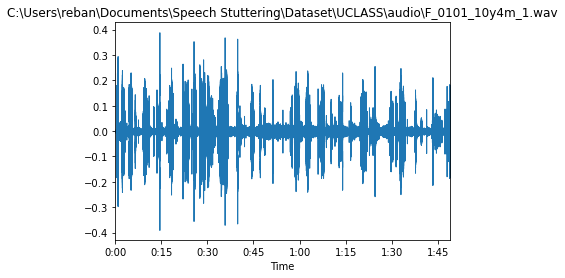

Match found


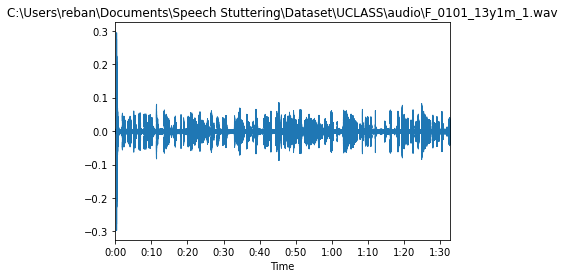

Match found


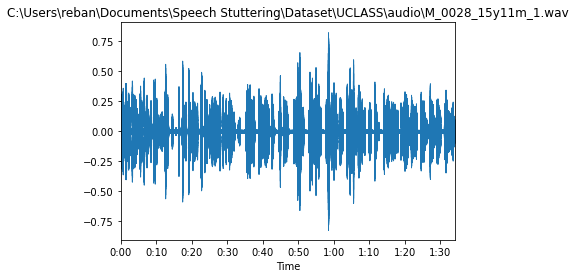

Match found


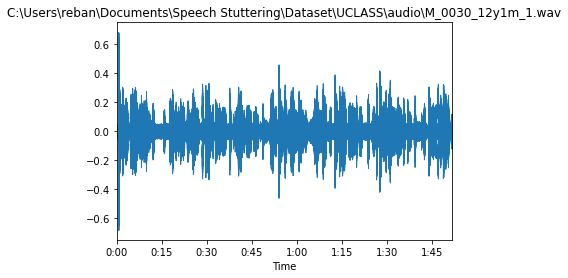

Match found


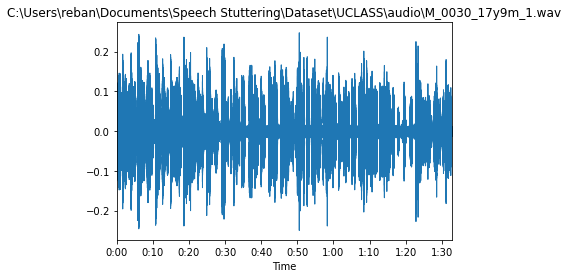

Match found


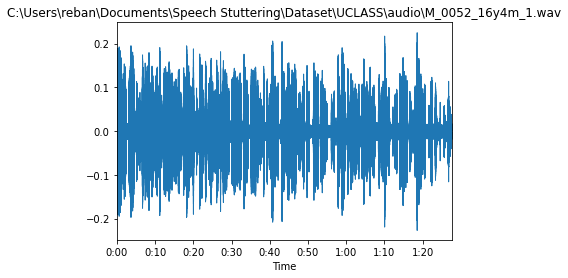

Match found


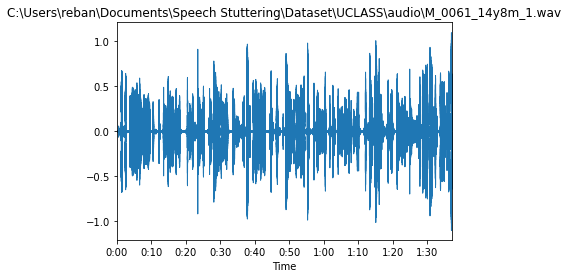

Match found


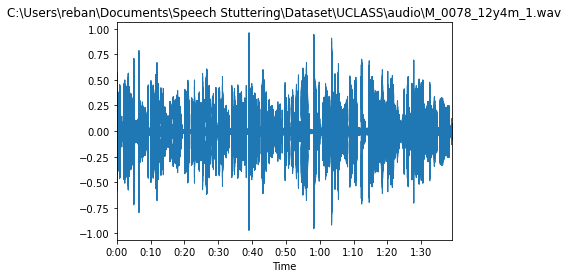

Match found


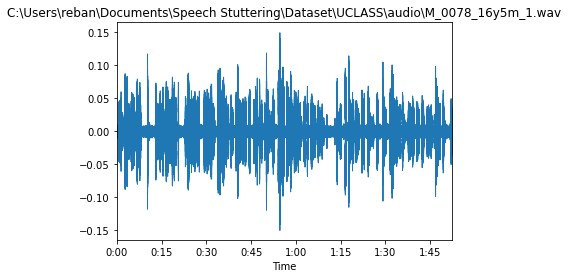

Match found


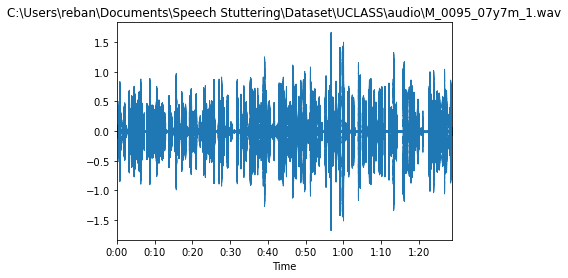

Match found


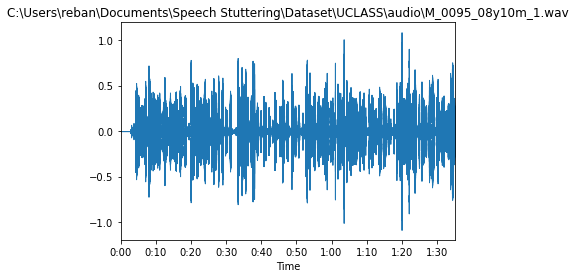

Match found


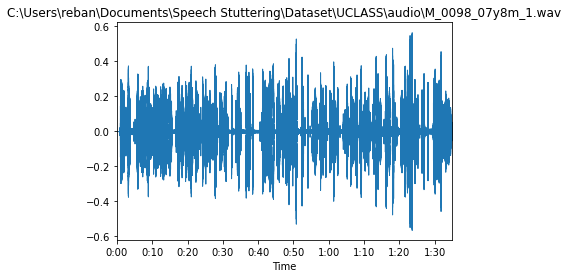

Match found


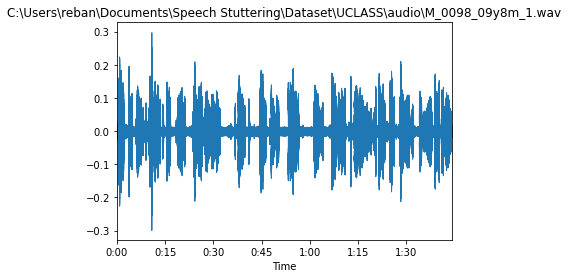

Match found


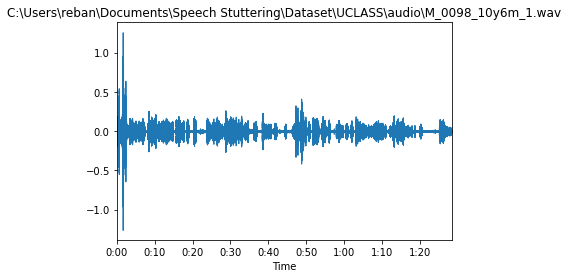

Match found


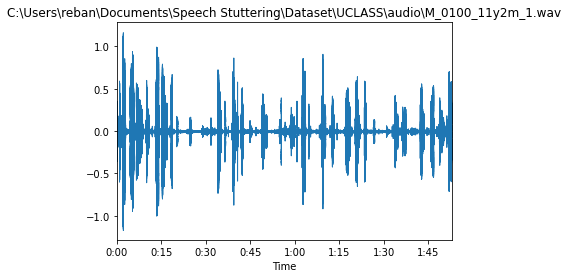

Match found


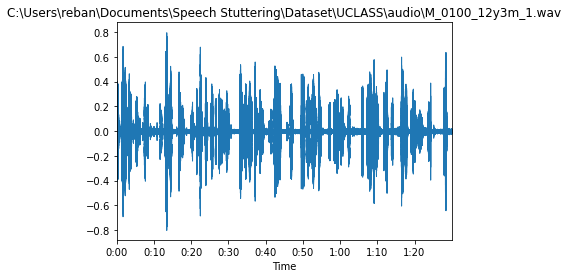

Match found


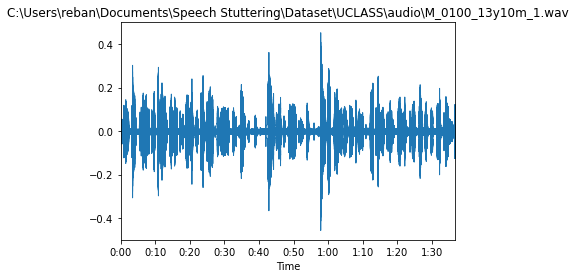

Match found


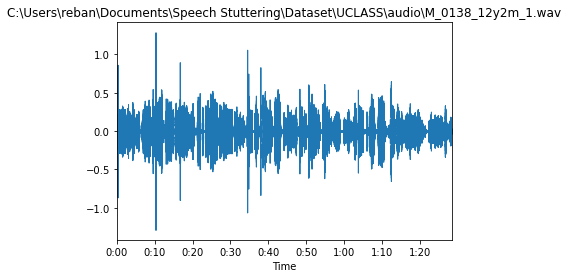

Match found


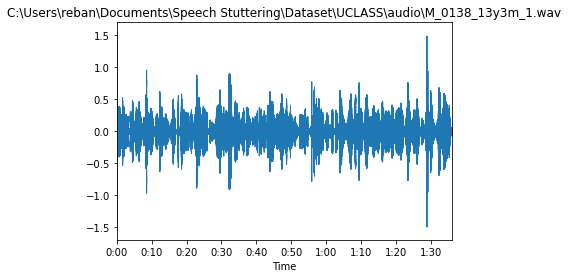

Match found


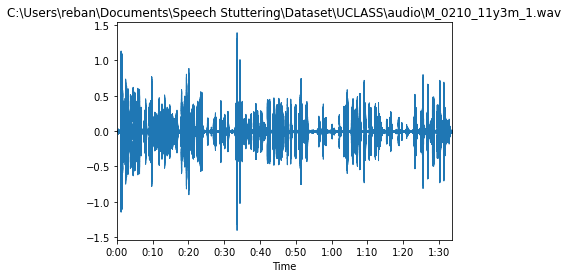

Match found


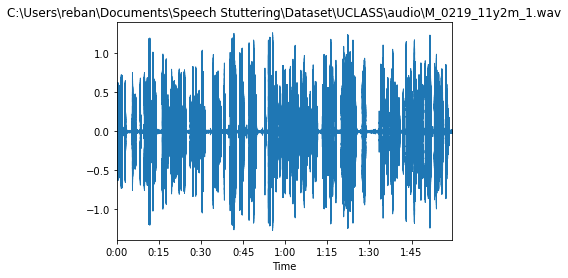

Match found


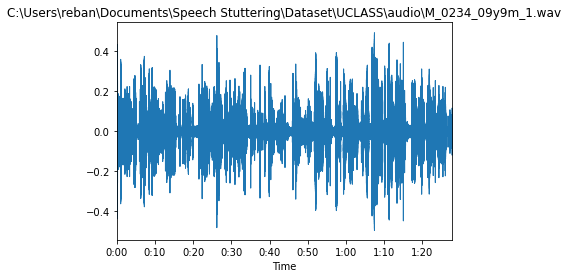

Match found


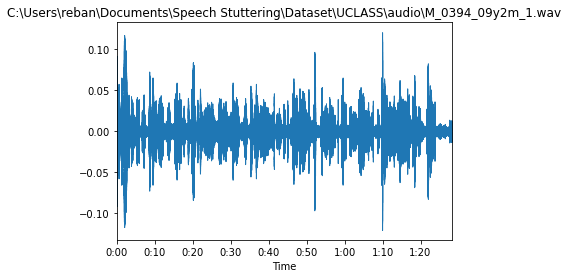

Match found


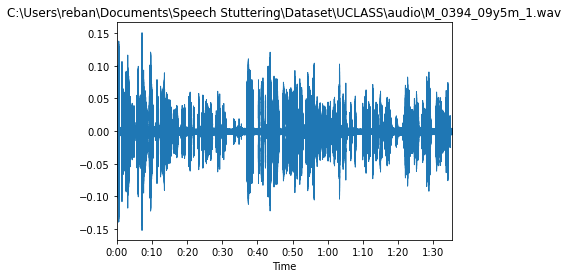

Match found


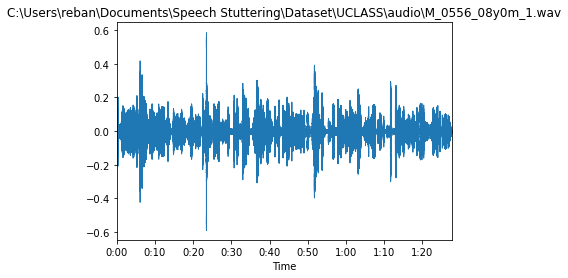

Standard deviation of sample rate = 0.0
All files resampled to minimum sampling rate of 16000


In [2]:
directory = "C:/Users/reban/Documents/Speech Stuttering/Dataset/UCLASS/audio/"
files = librosa.util.find_files(directory, ext=['wav']) 
files = np.asarray(files)
sr_store=[]
data_store=[]
min_sr=16000

# Resampling here to the minimum of All sampling rates, i,e 11025!
for y in files:
    # Reading 
    temp_data,temp_sr = librosa.load(y, sr = None)
    data_re=librosa.resample(temp_data, orig_sr=temp_sr, target_sr=min_sr, res_type='kaiser_fast',fix=True, scale=True)
    temp_data=np.array(temp_data)
    data_re=np.array(data_re)
    
    # Resampling
    soundfile.write('test.wav', data_re, samplerate=min_sr, subtype=None, endian=None, format=None, closefd=True)    # Plotting audio
    data,sr = librosa.load('test.wav', sr = None)
    data=np.array(data)
    
    # Checking
    if sr==min_sr:
        print("Match found")
    sr_store.append(sr)
    librosa.display.waveplot(data_re)
    plt.title(y)
    plt.show()
    
    # Storing audio data
    data_store.append(data_re)

store=np.array(data_store)
sr_store=np.array(sr_store)
std_sr=np.std(sr_store)
print("Standard deviation of sample rate = "+str(std_sr))
if (min(sr_store)==max(sr_store)):
    print("All files resampled to minimum sampling rate of "+str(min(sr_store)))
else:
    print("Resampling not finished")

In [4]:
# Getting time lengths of each audio file
secs=np.zeros((len(store),1))
count=0
for y in files:
    secs[count]=len(store[count])/min(sr_store)
    count+=1
print("The time of first audio file is "+str(secs[0]))

The time of first audio file is [150.08]


In [5]:
label_path="C:/Users/reban/Documents/Speech Stuttering/Dataset/UCLASS/metadata/"
label_files = os.listdir(label_path)
labels=[]
for filename in label_files:
    label_df=pd.read_csv(label_path+filename, usecols=[2,3,7],header=None)
    label_np=np.array(label_df)
    labels.append(label_np)
labels=np.array(labels)
label_df

,2,3,7
0,1.700000,2.870000,1
1,3.050000,3.180000,0
2,3.180000,3.400000,0
3,3.400000,4.260000,0
4,4.410000,4.790000,2
...,...,...,...
175,118.130000,118.140000,0
176,118.139999,118.459999,0
177,118.460000,118.560000,0
178,118.559999,118.589999,0


In [6]:
# store -> audio, sr_store -> sample rate, secs -> time, labels -> labels
# Cropping audio files
flag=1
seconds=4
seconds_sample=seconds*min_sr
count_ran=np.arange(count)
crop_store=[]
crops=[]
offset_dev=[]
crop_idx=[]
for i in count_ran:
    rem=len(store[i])-(math.floor(len(store[i])/seconds_sample))*seconds_sample
    crops.append(rem)
    offset=int(rem/2)
    offset_rem=rem%2
    audio_len=int(len(store[i]))
    if offset_rem==0:
        temp_store=store[i][0+offset:audio_len-offset]
        crop_idx.append(np.arange(start=0+offset, stop=audio_len-offset,step=1))
    else:
        temp_store=store[i][0+offset:audio_len-offset-1]
        crop_idx.append(np.arange(start=0+offset, stop=audio_len-offset-1,step=1))
    check_store=len(temp_store)%seconds_sample
    offset_dev.append(check_store)
    if check_store!=0:
        flag=0
    crop_store.append(temp_store)
    
if flag==1:
    print("Crops were perfect with STD = ",str(np.std(offset_dev)))

Crops were perfect with STD =  0.0


In [7]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

In [250]:
n_samples=[]
for i in  count_ran:
    num_samples=int(len(crop_store[i])/seconds_sample)
    #part_samples=chunkIt(crop_store[i],num_samples)
    parts_samples=np.reshape(crop_store[i],(num_samples,seconds_sample))
    
    parts_samples=np.array(parts_samples)
    if i==0:
        learning_samples=parts_samples
    else:
        learning_samples=np.concatenate((learning_samples,parts_samples), axis=0)
    n_samples.append(num_samples)
learn_samples=pd.DataFrame(learning_samples)
n_samples=np.array(n_samples)
print("Cropped dataset from both ends according to 4 seconds frame rate")
learn_samples

Cropped dataset from both ends according to 4 seconds frame rate


,0,1,2,3,4,5,6,7,8,9,...,63990,63991,63992,63993,63994,63995,63996,63997,63998,63999
0,0.005485,0.005924,0.007483,0.007614,0.008013,0.008453,0.009071,0.010014,0.009843,0.009483,...,0.001607,0.002161,0.001362,0.000231,0.000979,0.001946,0.001861,0.001918,0.002700,0.002667
1,0.002279,0.002199,0.002103,0.002867,0.004028,0.004283,0.003778,0.003623,0.004001,0.004142,...,-0.035349,-0.039851,-0.040531,-0.042360,-0.044500,-0.043237,-0.042406,-0.041115,-0.038740,-0.035880
2,-0.033066,-0.029954,-0.027470,-0.024773,-0.019193,-0.014677,-0.012902,-0.009421,-0.005175,-0.002839,...,-0.056757,-0.044962,-0.009016,0.010093,-0.016650,-0.048527,-0.056396,-0.066903,-0.064503,-0.021570
3,0.021779,0.040137,0.038176,0.027190,0.020953,0.015944,0.026278,0.059868,0.093144,0.113520,...,-0.035047,-0.026988,-0.018741,-0.012395,-0.007563,-0.000771,0.007887,0.012174,0.010751,0.007132
4,0.003555,-0.001763,-0.007323,-0.006935,0.002225,0.015429,0.023527,0.026830,0.027950,0.025873,...,0.006878,0.002509,-0.001219,0.003987,0.005269,0.007958,0.009662,0.004926,0.005990,0.004018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,0.052800,0.050104,0.052728,0.046302,0.034058,0.028541,0.025906,0.013971,0.001502,-0.008087,...,-0.002662,-0.002649,-0.002215,-0.002257,-0.002338,-0.002376,-0.002722,-0.002830,-0.002962,-0.003264
818,-0.003615,-0.003398,-0.003240,-0.003433,-0.003647,-0.003612,-0.003488,-0.003768,-0.003892,-0.003839,...,-0.017245,-0.019678,-0.021139,-0.021600,-0.023538,-0.023102,-0.021368,-0.024470,-0.030834,-0.037803
819,-0.041433,-0.041629,-0.044469,-0.050498,-0.049951,-0.042578,-0.042381,-0.049207,-0.052651,-0.049365,...,0.001881,0.002156,0.002668,0.002774,0.002855,0.003180,0.003270,0.003241,0.003238,0.003408
820,0.004270,0.005638,0.006469,0.006662,0.006976,0.007423,0.007318,0.006552,0.005893,0.005891,...,0.009852,0.012882,0.009526,0.001446,-0.002843,-0.006783,-0.003166,-0.003504,-0.004739,0.000128


In [9]:
labels_mod=[]
labels_time_mod=[]
n_timestamps=[]
for l in count_ran:
    # Time to samples
    labels_time=labels[l][:][:,0:2]*min_sr
    labels_time=np.floor(np.array(labels_time))
    m_t,n_t=labels_time.shape
    
    # Getting labels
    labels_samp=np.floor(np.array(labels[l][:][:,2]))
    
    # Finding crops and adjusting labels
    quo=int(crops[l]/2)
    remain=crops[l]%2
    print(len(crop_store[l])+quo)
    print(quo)

    # Assigning crops to labels
    m_start=0
    m_end=int(m_t-1)
    if remain==0:
        for i in range(0,m_t):
            if labels_time[i,0]>quo:
                m_start=int(i)
                print("In 0")
                break
        for i in range(0,m_t):
            if labels_time[i,1]>len(crop_store[l])+quo:
                m_end=int(i-1)
                break
    if remain!=0:
        for i in range(0,m_t):
            if labels_time[i,0]>quo-1:
                m_start=int(i)
                print("In 1")
                break
        for i in range(0,m_t):
            if labels_time[i,1]>len(crop_store[l])+quo+1:
                m_end=int(i-1)
                break
    print(labels_time[m_start,0],labels_time[m_end,1])
    if (m_start==0 or int(labels_time[m_start-1,0])<int(quo)) and (m_end==m_t-1 or int(labels_time[m_end+1,1])>int(len(crop_store[l])+quo)):
        print("Labels ready for audio " + str(l))
    labels_time_modified=labels_time[m_start:m_end,:]
    labels_samp_modified=labels_samp[m_start:m_end]
    labels_time_mod.append(labels_time_modified)
    labels_mod.append(labels_samp_modified)
    print("Labels changed")
    n_timestamps.append((len(labels_samp[m_start:m_end])))
n_timestamps=np.array(n_timestamps)

2384640
16640
In 0
16960.0 1608320.0
Labels ready for audio 0
Labels changed
2013440
29440
In 0
40800.0 1999360.0
Labels ready for audio 1
Labels changed
2063325
15325
In 1
22400.0 2054880.0
Labels ready for audio 2
Labels changed
2444800
12800
In 0
14080.0 2440960.0
Labels ready for audio 3
Labels changed
2014607
30607
In 0
30880.0 2008639.0
Labels ready for audio 4
Labels changed
1925597
5597
In 1
8160.0 1892320.0
Labels ready for audio 5
Labels changed
2125976
13976
In 0
23840.0 2121280.0
Labels ready for audio 6
Labels changed
2179714
3714
In 0
12640.0 2160159.0
Labels ready for audio 7
Labels changed
2453159
21159
In 1
38880.0 2387360.0
Labels ready for audio 8
Labels changed
1938024
18024
In 1
37280.0 1925760.0
Labels ready for audio 9
Labels changed
2074471
26471
In 0
89280.0 2069120.0
Labels ready for audio 10
Labels changed
2068898
20898
In 0
23520.0 2067199.0
Labels ready for audio 11
Labels changed
2267484
27484
In 0
36960.0 2262400.0
Labels ready for audio 12
Labels changed

In [240]:
labels_time_mod=np.array(labels_time_mod)
labels_mod=np.array(labels_mod)
crop_idx=np.array(crop_idx)
c_label=[]
s_label=[]

for l in count_ran:
    temp_time=labels_time_mod[l]
    #print(temp_time)
    temp_label=labels_mod[l]
    #print(temp_label)
    part_samps=np.split(crop_idx[l],n_samples[l])
    part_samps=np.array(part_samps)
    m_t,n_t=part_samps.shape
    start_end=np.zeros((m_t,2))
    for i in range(0,m_t):
        #print("in sample " +str(i))
        start_end[i,0]=0
        for j in range(0,n_timestamps[l]):
            if temp_time[j,0]>=part_samps[i,0] and temp_time[j,0]<=part_samps[i,seconds_sample-1]:
                start_end[i,0]=j
                #print("for start")
                #print(j)
                temp_ran_start=j
                break
            else:
                start_end[i,0]=temp_ran_start
        start_end[i,1]=max(start_end[i,0],start_end[i-1,1])     
        for j in range(0,n_timestamps[l]):
            if temp_time[j,1]<=part_samps[i,seconds_sample-1] and temp_time[j,1]>=part_samps[i,0]:
                start_end[i,1]=j
                #print("for end")
                #print(j)
        sample_label=temp_label[int(start_end[i,0]):int(start_end[i,1]+1)]
        where_are_NaNs = np.isnan(sample_label)
        sample_label[where_are_NaNs] = 0
        s_label.append(sample_label)
        count_label=start_end[i,1]-start_end[i,0]+1
        c_label.append(count_label)
    if (sum(c_label)>=n_timestamps[l]):
        print("Labels Set for audio "+ str(l))
    #print(start_end)
    #print(sum(c_label))
s_label=np.array(s_label)
c_label=np.array(c_label)
m_ls,=s_label.shape
std_label=[]
for i in range(0,m_ls):
    std_label.append(np.std(s_label[i]))
store_std=np.argwhere(np.isnan(std_label))
s_label[store_std]

Labels Set for audio 0
Labels Set for audio 1
Labels Set for audio 2
Labels Set for audio 3
Labels Set for audio 4
Labels Set for audio 5
Labels Set for audio 6
Labels Set for audio 7
Labels Set for audio 8
Labels Set for audio 9
Labels Set for audio 10
Labels Set for audio 11
Labels Set for audio 12
Labels Set for audio 13
Labels Set for audio 14
Labels Set for audio 15
Labels Set for audio 16
Labels Set for audio 17
Labels Set for audio 18
Labels Set for audio 19
Labels Set for audio 20
Labels Set for audio 21
Labels Set for audio 22
Labels Set for audio 23
Labels Set for audio 24


array([[array([], dtype=float64)]], dtype=object)

0 has maximum occurences with 100.0%
4 has maximum occurences with 60.0%
0 has maximum occurences with 100.0%
0 has maximum occurences with 100.0%
0 has maximum occurences with 100.0%
0 has maximum occurences with 66.66666666666666%
2 has maximum occurences with 100.0%
0 has maximum occurences with 66.66666666666666%
0 has maximum occurences with 60.0%
0 has maximum occurences with 66.66666666666666%
2 has maximum occurences with 66.66666666666666%
0 has maximum occurences with 85.71428571428571%
0 has maximum occurences with 100.0%
1 has maximum occurences with 100.0%
0 has maximum occurences with 100.0%
0 has maximum occurences with 50.0%
0 has maximum occurences with 50.0%
0 has maximum occurences with 50.0%
0 has maximum occurences with 50.0%
0 has maximum occurences with 66.66666666666666%
0 has maximum occurences with 75.0%
0 has maximum occurences with 62.5%
0 has maximum occurences with 83.33333333333334%
1 has maximum occurences with 100.0%
0 has maximum occurences with 100.0%

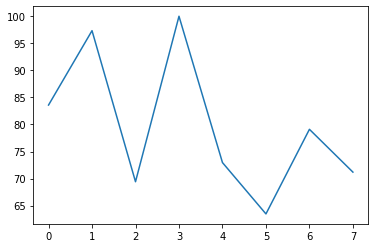

Overall:
Overall consistency in labels = 82.30640171494618%


In [434]:
ls_c0=0
ls_count0=[]
ls_c1=0
ls_count1=[]
ls_c2=0
ls_count2=[]
ls_c3=0
ls_count3=[]
ls_c4=0
ls_count4=[]
ls_c5=0
ls_count5=[]
ls_c6=0
ls_count6=[]
ls_c7=0
ls_count7=[]
ls_c=[]
ls_count=[]
c_sum=0
for i in range(0,m_ls):
    if i==store_std:
        counts=[1]
        c_len=1
    else:
        c=s_label[i]
        if isinstance(c, int):
            c=c
        else:
            c=c.astype(np.int)
        counts = np.bincount(c)
        #print(counts)
        c_len=sum(counts)
    c_counts=(np.argmax(counts))
    occ=max(counts)
    per=(occ/c_len)*100
    print(str(c_counts)+" has maximum occurences with "+str(per)+"%" )
    c_sum=c_sum+per
    if c_counts==0:
        ls_count0.append(per)
        ls_c0=(ls_c0+per)
    if c_counts==1:
        ls_count1.append(per)
        ls_c1=(ls_c1+per)
    if c_counts==2:
        ls_count2.append(per)
        ls_c2=(ls_c2+per)
    if c_counts==3:
        ls_count3.append(per)
        ls_c3=(ls_c3+per)
    if c_counts==4:
        ls_count4.append(per)
        ls_c4=(ls_c4+per)
    if c_counts==5:
        ls_count5.append(per)
        ls_c5=(ls_c5+per)
    if c_counts==6:
        ls_count6.append(per)
        ls_c6=(ls_c6+per)
    if c_counts==7:
        ls_count7.append(per)
        ls_c7=(ls_c7+per)
ls_c0=ls_c0/len(ls_count0)
ls_c.append(ls_c0)
ls_c1=ls_c1/len(ls_count1)
ls_c.append(ls_c1)
ls_c2=ls_c2/len(ls_count2)
ls_c.append(ls_c2)
ls_c3=ls_c3/len(ls_count3)
ls_c.append(ls_c3)
ls_c4=ls_c4/len(ls_count4)
ls_c.append(ls_c4)
ls_c5=ls_c5/len(ls_count5)
ls_c.append(ls_c5)
ls_c6=ls_c6/len(ls_count6)
ls_c.append(ls_c6)
ls_c7=ls_c7/len(ls_count7)
ls_c.append(ls_c7)
plt.plot(ls_c)
plt.show()
ls_count.append(per)
c_avg=c_sum/m_ls
print("Overall:")
print("Overall consistency in labels = " +str(c_avg)+"%")

In [435]:
d_rows=int(sum(c_label))
dataset=np.zeros((d_rows,seconds_sample+1))
print(dataset.shape)
s_label=np.array(s_label)
c_label=np.array(c_label)
m_ls,=s_label.shape
print(learning_samples.shape)
print(s_label.shape)
k=0
temp_zeros=np.zeros((1,seconds_sample+1))
for i in range(0,m_ls):
    for j in range(0,int(c_label[i])):      
        dataset[k,0:seconds_sample]=learning_samples[i,:]
        dataset[k,seconds_sample]=s_label[i][j].astype(int)
        k=k+1
print(k)
dataset[~np.isnan(dataset).any(axis=1)]
m_df,n_df=dataset.shape
pd.DataFrame(dataset)

(5444, 64001)
(822, 64000)
(822,)
5444


,0,1,2,3,4,5,6,7,8,9,...,63991,63992,63993,63994,63995,63996,63997,63998,63999,64000
0,0.005485,0.005924,0.007483,0.007614,0.008013,0.008453,0.009071,0.010014,0.009843,0.009483,...,0.002161,0.001362,0.000231,0.000979,0.001946,0.001861,0.001918,0.002700,0.002667,0.0
1,0.005485,0.005924,0.007483,0.007614,0.008013,0.008453,0.009071,0.010014,0.009843,0.009483,...,0.002161,0.001362,0.000231,0.000979,0.001946,0.001861,0.001918,0.002700,0.002667,0.0
2,0.005485,0.005924,0.007483,0.007614,0.008013,0.008453,0.009071,0.010014,0.009843,0.009483,...,0.002161,0.001362,0.000231,0.000979,0.001946,0.001861,0.001918,0.002700,0.002667,0.0
3,0.002279,0.002199,0.002103,0.002867,0.004028,0.004283,0.003778,0.003623,0.004001,0.004142,...,-0.039851,-0.040531,-0.042360,-0.044500,-0.043237,-0.042406,-0.041115,-0.038740,-0.035880,1.0
4,0.002279,0.002199,0.002103,0.002867,0.004028,0.004283,0.003778,0.003623,0.004001,0.004142,...,-0.039851,-0.040531,-0.042360,-0.044500,-0.043237,-0.042406,-0.041115,-0.038740,-0.035880,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5439,-0.000727,-0.001888,-0.005695,-0.012056,-0.011437,-0.011532,-0.009277,-0.006070,-0.003658,0.001884,...,0.005247,-0.000762,-0.000689,0.000398,-0.000837,0.000722,0.008302,0.012705,0.007207,4.0
5440,-0.000727,-0.001888,-0.005695,-0.012056,-0.011437,-0.011532,-0.009277,-0.006070,-0.003658,0.001884,...,0.005247,-0.000762,-0.000689,0.000398,-0.000837,0.000722,0.008302,0.012705,0.007207,0.0
5441,-0.000727,-0.001888,-0.005695,-0.012056,-0.011437,-0.011532,-0.009277,-0.006070,-0.003658,0.001884,...,0.005247,-0.000762,-0.000689,0.000398,-0.000837,0.000722,0.008302,0.012705,0.007207,0.0
5442,-0.000727,-0.001888,-0.005695,-0.012056,-0.011437,-0.011532,-0.009277,-0.006070,-0.003658,0.001884,...,0.005247,-0.000762,-0.000689,0.000398,-0.000837,0.000722,0.008302,0.012705,0.007207,0.0


Text(0.5, 0, 'Sample')

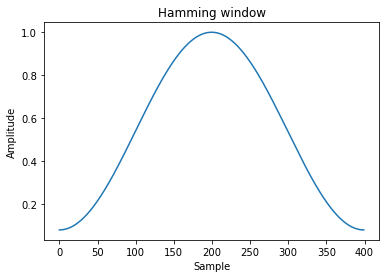

In [446]:
win_len=int((25/1000)*min_sr)
overlap_len=int((10/1000)*min_sr)
window = signal.windows.hamming(win_len)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

In [443]:
def graph_spectrogram(data,rate,i):
    digits=4-len(str(i+1))
    zerostring="0"*digits
    fig,ax=plt.subplots(1)
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    ax.axis('off')
    pxx,freqs,bins,im=ax.specgram(x=data,Fs=rate,noverlap=overlap_len,NFFT=win_len)
    ax.axis('off')
    fig.savefig('Executable/spec_'+str(zerostring)+str(i+1)+'.png',dpi=300,frameon='false')
    #print('Executable/spec_'+zerostring+str(i+1)+'.png')
    plt.close()

In [444]:
for i in range(0,m_df):
    graph_spectrogram(dataset[i,0:seconds_sample],min_sr,i)

In [449]:
# load all images in a directory
n_images=m_df;
length=64;
width=64;
class_num=40
i=0
summ=0;
list_imgs=np.zeros((n_images,length,width,3))
loaded_images = list()
for filename in listdir('Executable'):
    rgba_image = PIL.Image.open('Executable/' + filename)
    rgb_image = rgba_image.convert('RGB')
    new_image = rgb_image.resize((length, width))
    list_imgs[i,:,:,:] = np.array(new_image);
    #pyplot.imshow(new_image)
    #pyplot.show()
    #print(np.array(new_image))
    loaded_images.append(filename)
    print('> loaded %s %s' % (filename, np.array(new_image).shape))
    summ=summ+1;
    i=i+1
    print(summ)
print(summ);


> loaded spec_0001.png (64, 64, 3)
1
> loaded spec_0002.png (64, 64, 3)
2
> loaded spec_0003.png (64, 64, 3)
3
> loaded spec_0004.png (64, 64, 3)
4
> loaded spec_0005.png (64, 64, 3)
5
> loaded spec_0006.png (64, 64, 3)
6
> loaded spec_0007.png (64, 64, 3)
7
> loaded spec_0008.png (64, 64, 3)
8
> loaded spec_0009.png (64, 64, 3)
9
> loaded spec_0010.png (64, 64, 3)
10
> loaded spec_0011.png (64, 64, 3)
11
> loaded spec_0012.png (64, 64, 3)
12
> loaded spec_0013.png (64, 64, 3)
13
> loaded spec_0014.png (64, 64, 3)
14
> loaded spec_0015.png (64, 64, 3)
15
> loaded spec_0016.png (64, 64, 3)
16
> loaded spec_0017.png (64, 64, 3)
17
> loaded spec_0018.png (64, 64, 3)
18
> loaded spec_0019.png (64, 64, 3)
19
> loaded spec_0020.png (64, 64, 3)
20
> loaded spec_0021.png (64, 64, 3)
21
> loaded spec_0022.png (64, 64, 3)
22
> loaded spec_0023.png (64, 64, 3)
23
> loaded spec_0024.png (64, 64, 3)
24
> loaded spec_0025.png (64, 64, 3)
25
> loaded spec_0026.png (64, 64, 3)
26
> loaded spec_0027.pn

> loaded spec_0213.png (64, 64, 3)
213
> loaded spec_0214.png (64, 64, 3)
214
> loaded spec_0215.png (64, 64, 3)
215
> loaded spec_0216.png (64, 64, 3)
216
> loaded spec_0217.png (64, 64, 3)
217
> loaded spec_0218.png (64, 64, 3)
218
> loaded spec_0219.png (64, 64, 3)
219
> loaded spec_0220.png (64, 64, 3)
220
> loaded spec_0221.png (64, 64, 3)
221
> loaded spec_0222.png (64, 64, 3)
222
> loaded spec_0223.png (64, 64, 3)
223
> loaded spec_0224.png (64, 64, 3)
224
> loaded spec_0225.png (64, 64, 3)
225
> loaded spec_0226.png (64, 64, 3)
226
> loaded spec_0227.png (64, 64, 3)
227
> loaded spec_0228.png (64, 64, 3)
228
> loaded spec_0229.png (64, 64, 3)
229
> loaded spec_0230.png (64, 64, 3)
230
> loaded spec_0231.png (64, 64, 3)
231
> loaded spec_0232.png (64, 64, 3)
232
> loaded spec_0233.png (64, 64, 3)
233
> loaded spec_0234.png (64, 64, 3)
234
> loaded spec_0235.png (64, 64, 3)
235
> loaded spec_0236.png (64, 64, 3)
236
> loaded spec_0237.png (64, 64, 3)
237
> loaded spec_0238.png (6

> loaded spec_0427.png (64, 64, 3)
427
> loaded spec_0428.png (64, 64, 3)
428
> loaded spec_0429.png (64, 64, 3)
429
> loaded spec_0430.png (64, 64, 3)
430
> loaded spec_0431.png (64, 64, 3)
431
> loaded spec_0432.png (64, 64, 3)
432
> loaded spec_0433.png (64, 64, 3)
433
> loaded spec_0434.png (64, 64, 3)
434
> loaded spec_0435.png (64, 64, 3)
435
> loaded spec_0436.png (64, 64, 3)
436
> loaded spec_0437.png (64, 64, 3)
437
> loaded spec_0438.png (64, 64, 3)
438
> loaded spec_0439.png (64, 64, 3)
439
> loaded spec_0440.png (64, 64, 3)
440
> loaded spec_0441.png (64, 64, 3)
441
> loaded spec_0442.png (64, 64, 3)
442
> loaded spec_0443.png (64, 64, 3)
443
> loaded spec_0444.png (64, 64, 3)
444
> loaded spec_0445.png (64, 64, 3)
445
> loaded spec_0446.png (64, 64, 3)
446
> loaded spec_0447.png (64, 64, 3)
447
> loaded spec_0448.png (64, 64, 3)
448
> loaded spec_0449.png (64, 64, 3)
449
> loaded spec_0450.png (64, 64, 3)
450
> loaded spec_0451.png (64, 64, 3)
451
> loaded spec_0452.png (6

> loaded spec_0639.png (64, 64, 3)
639
> loaded spec_0640.png (64, 64, 3)
640
> loaded spec_0641.png (64, 64, 3)
641
> loaded spec_0642.png (64, 64, 3)
642
> loaded spec_0643.png (64, 64, 3)
643
> loaded spec_0644.png (64, 64, 3)
644
> loaded spec_0645.png (64, 64, 3)
645
> loaded spec_0646.png (64, 64, 3)
646
> loaded spec_0647.png (64, 64, 3)
647
> loaded spec_0648.png (64, 64, 3)
648
> loaded spec_0649.png (64, 64, 3)
649
> loaded spec_0650.png (64, 64, 3)
650
> loaded spec_0651.png (64, 64, 3)
651
> loaded spec_0652.png (64, 64, 3)
652
> loaded spec_0653.png (64, 64, 3)
653
> loaded spec_0654.png (64, 64, 3)
654
> loaded spec_0655.png (64, 64, 3)
655
> loaded spec_0656.png (64, 64, 3)
656
> loaded spec_0657.png (64, 64, 3)
657
> loaded spec_0658.png (64, 64, 3)
658
> loaded spec_0659.png (64, 64, 3)
659
> loaded spec_0660.png (64, 64, 3)
660
> loaded spec_0661.png (64, 64, 3)
661
> loaded spec_0662.png (64, 64, 3)
662
> loaded spec_0663.png (64, 64, 3)
663
> loaded spec_0664.png (6

> loaded spec_0852.png (64, 64, 3)
852
> loaded spec_0853.png (64, 64, 3)
853
> loaded spec_0854.png (64, 64, 3)
854
> loaded spec_0855.png (64, 64, 3)
855
> loaded spec_0856.png (64, 64, 3)
856
> loaded spec_0857.png (64, 64, 3)
857
> loaded spec_0858.png (64, 64, 3)
858
> loaded spec_0859.png (64, 64, 3)
859
> loaded spec_0860.png (64, 64, 3)
860
> loaded spec_0861.png (64, 64, 3)
861
> loaded spec_0862.png (64, 64, 3)
862
> loaded spec_0863.png (64, 64, 3)
863
> loaded spec_0864.png (64, 64, 3)
864
> loaded spec_0865.png (64, 64, 3)
865
> loaded spec_0866.png (64, 64, 3)
866
> loaded spec_0867.png (64, 64, 3)
867
> loaded spec_0868.png (64, 64, 3)
868
> loaded spec_0869.png (64, 64, 3)
869
> loaded spec_0870.png (64, 64, 3)
870
> loaded spec_0871.png (64, 64, 3)
871
> loaded spec_0872.png (64, 64, 3)
872
> loaded spec_0873.png (64, 64, 3)
873
> loaded spec_0874.png (64, 64, 3)
874
> loaded spec_0875.png (64, 64, 3)
875
> loaded spec_0876.png (64, 64, 3)
876
> loaded spec_0877.png (6

> loaded spec_1062.png (64, 64, 3)
1062
> loaded spec_1063.png (64, 64, 3)
1063
> loaded spec_1064.png (64, 64, 3)
1064
> loaded spec_1065.png (64, 64, 3)
1065
> loaded spec_1066.png (64, 64, 3)
1066
> loaded spec_1067.png (64, 64, 3)
1067
> loaded spec_1068.png (64, 64, 3)
1068
> loaded spec_1069.png (64, 64, 3)
1069
> loaded spec_1070.png (64, 64, 3)
1070
> loaded spec_1071.png (64, 64, 3)
1071
> loaded spec_1072.png (64, 64, 3)
1072
> loaded spec_1073.png (64, 64, 3)
1073
> loaded spec_1074.png (64, 64, 3)
1074
> loaded spec_1075.png (64, 64, 3)
1075
> loaded spec_1076.png (64, 64, 3)
1076
> loaded spec_1077.png (64, 64, 3)
1077
> loaded spec_1078.png (64, 64, 3)
1078
> loaded spec_1079.png (64, 64, 3)
1079
> loaded spec_1080.png (64, 64, 3)
1080
> loaded spec_1081.png (64, 64, 3)
1081
> loaded spec_1082.png (64, 64, 3)
1082
> loaded spec_1083.png (64, 64, 3)
1083
> loaded spec_1084.png (64, 64, 3)
1084
> loaded spec_1085.png (64, 64, 3)
1085
> loaded spec_1086.png (64, 64, 3)
1086


> loaded spec_1268.png (64, 64, 3)
1268
> loaded spec_1269.png (64, 64, 3)
1269
> loaded spec_1270.png (64, 64, 3)
1270
> loaded spec_1271.png (64, 64, 3)
1271
> loaded spec_1272.png (64, 64, 3)
1272
> loaded spec_1273.png (64, 64, 3)
1273
> loaded spec_1274.png (64, 64, 3)
1274
> loaded spec_1275.png (64, 64, 3)
1275
> loaded spec_1276.png (64, 64, 3)
1276
> loaded spec_1277.png (64, 64, 3)
1277
> loaded spec_1278.png (64, 64, 3)
1278
> loaded spec_1279.png (64, 64, 3)
1279
> loaded spec_1280.png (64, 64, 3)
1280
> loaded spec_1281.png (64, 64, 3)
1281
> loaded spec_1282.png (64, 64, 3)
1282
> loaded spec_1283.png (64, 64, 3)
1283
> loaded spec_1284.png (64, 64, 3)
1284
> loaded spec_1285.png (64, 64, 3)
1285
> loaded spec_1286.png (64, 64, 3)
1286
> loaded spec_1287.png (64, 64, 3)
1287
> loaded spec_1288.png (64, 64, 3)
1288
> loaded spec_1289.png (64, 64, 3)
1289
> loaded spec_1290.png (64, 64, 3)
1290
> loaded spec_1291.png (64, 64, 3)
1291
> loaded spec_1292.png (64, 64, 3)
1292


> loaded spec_1475.png (64, 64, 3)
1475
> loaded spec_1476.png (64, 64, 3)
1476
> loaded spec_1477.png (64, 64, 3)
1477
> loaded spec_1478.png (64, 64, 3)
1478
> loaded spec_1479.png (64, 64, 3)
1479
> loaded spec_1480.png (64, 64, 3)
1480
> loaded spec_1481.png (64, 64, 3)
1481
> loaded spec_1482.png (64, 64, 3)
1482
> loaded spec_1483.png (64, 64, 3)
1483
> loaded spec_1484.png (64, 64, 3)
1484
> loaded spec_1485.png (64, 64, 3)
1485
> loaded spec_1486.png (64, 64, 3)
1486
> loaded spec_1487.png (64, 64, 3)
1487
> loaded spec_1488.png (64, 64, 3)
1488
> loaded spec_1489.png (64, 64, 3)
1489
> loaded spec_1490.png (64, 64, 3)
1490
> loaded spec_1491.png (64, 64, 3)
1491
> loaded spec_1492.png (64, 64, 3)
1492
> loaded spec_1493.png (64, 64, 3)
1493
> loaded spec_1494.png (64, 64, 3)
1494
> loaded spec_1495.png (64, 64, 3)
1495
> loaded spec_1496.png (64, 64, 3)
1496
> loaded spec_1497.png (64, 64, 3)
1497
> loaded spec_1498.png (64, 64, 3)
1498
> loaded spec_1499.png (64, 64, 3)
1499


> loaded spec_1681.png (64, 64, 3)
1681
> loaded spec_1682.png (64, 64, 3)
1682
> loaded spec_1683.png (64, 64, 3)
1683
> loaded spec_1684.png (64, 64, 3)
1684
> loaded spec_1685.png (64, 64, 3)
1685
> loaded spec_1686.png (64, 64, 3)
1686
> loaded spec_1687.png (64, 64, 3)
1687
> loaded spec_1688.png (64, 64, 3)
1688
> loaded spec_1689.png (64, 64, 3)
1689
> loaded spec_1690.png (64, 64, 3)
1690
> loaded spec_1691.png (64, 64, 3)
1691
> loaded spec_1692.png (64, 64, 3)
1692
> loaded spec_1693.png (64, 64, 3)
1693
> loaded spec_1694.png (64, 64, 3)
1694
> loaded spec_1695.png (64, 64, 3)
1695
> loaded spec_1696.png (64, 64, 3)
1696
> loaded spec_1697.png (64, 64, 3)
1697
> loaded spec_1698.png (64, 64, 3)
1698
> loaded spec_1699.png (64, 64, 3)
1699
> loaded spec_1700.png (64, 64, 3)
1700
> loaded spec_1701.png (64, 64, 3)
1701
> loaded spec_1702.png (64, 64, 3)
1702
> loaded spec_1703.png (64, 64, 3)
1703
> loaded spec_1704.png (64, 64, 3)
1704
> loaded spec_1705.png (64, 64, 3)
1705


> loaded spec_1888.png (64, 64, 3)
1888
> loaded spec_1889.png (64, 64, 3)
1889
> loaded spec_1890.png (64, 64, 3)
1890
> loaded spec_1891.png (64, 64, 3)
1891
> loaded spec_1892.png (64, 64, 3)
1892
> loaded spec_1893.png (64, 64, 3)
1893
> loaded spec_1894.png (64, 64, 3)
1894
> loaded spec_1895.png (64, 64, 3)
1895
> loaded spec_1896.png (64, 64, 3)
1896
> loaded spec_1897.png (64, 64, 3)
1897
> loaded spec_1898.png (64, 64, 3)
1898
> loaded spec_1899.png (64, 64, 3)
1899
> loaded spec_1900.png (64, 64, 3)
1900
> loaded spec_1901.png (64, 64, 3)
1901
> loaded spec_1902.png (64, 64, 3)
1902
> loaded spec_1903.png (64, 64, 3)
1903
> loaded spec_1904.png (64, 64, 3)
1904
> loaded spec_1905.png (64, 64, 3)
1905
> loaded spec_1906.png (64, 64, 3)
1906
> loaded spec_1907.png (64, 64, 3)
1907
> loaded spec_1908.png (64, 64, 3)
1908
> loaded spec_1909.png (64, 64, 3)
1909
> loaded spec_1910.png (64, 64, 3)
1910
> loaded spec_1911.png (64, 64, 3)
1911
> loaded spec_1912.png (64, 64, 3)
1912


> loaded spec_2092.png (64, 64, 3)
2092
> loaded spec_2093.png (64, 64, 3)
2093
> loaded spec_2094.png (64, 64, 3)
2094
> loaded spec_2095.png (64, 64, 3)
2095
> loaded spec_2096.png (64, 64, 3)
2096
> loaded spec_2097.png (64, 64, 3)
2097
> loaded spec_2098.png (64, 64, 3)
2098
> loaded spec_2099.png (64, 64, 3)
2099
> loaded spec_2100.png (64, 64, 3)
2100
> loaded spec_2101.png (64, 64, 3)
2101
> loaded spec_2102.png (64, 64, 3)
2102
> loaded spec_2103.png (64, 64, 3)
2103
> loaded spec_2104.png (64, 64, 3)
2104
> loaded spec_2105.png (64, 64, 3)
2105
> loaded spec_2106.png (64, 64, 3)
2106
> loaded spec_2107.png (64, 64, 3)
2107
> loaded spec_2108.png (64, 64, 3)
2108
> loaded spec_2109.png (64, 64, 3)
2109
> loaded spec_2110.png (64, 64, 3)
2110
> loaded spec_2111.png (64, 64, 3)
2111
> loaded spec_2112.png (64, 64, 3)
2112
> loaded spec_2113.png (64, 64, 3)
2113
> loaded spec_2114.png (64, 64, 3)
2114
> loaded spec_2115.png (64, 64, 3)
2115
> loaded spec_2116.png (64, 64, 3)
2116


> loaded spec_2300.png (64, 64, 3)
2300
> loaded spec_2301.png (64, 64, 3)
2301
> loaded spec_2302.png (64, 64, 3)
2302
> loaded spec_2303.png (64, 64, 3)
2303
> loaded spec_2304.png (64, 64, 3)
2304
> loaded spec_2305.png (64, 64, 3)
2305
> loaded spec_2306.png (64, 64, 3)
2306
> loaded spec_2307.png (64, 64, 3)
2307
> loaded spec_2308.png (64, 64, 3)
2308
> loaded spec_2309.png (64, 64, 3)
2309
> loaded spec_2310.png (64, 64, 3)
2310
> loaded spec_2311.png (64, 64, 3)
2311
> loaded spec_2312.png (64, 64, 3)
2312
> loaded spec_2313.png (64, 64, 3)
2313
> loaded spec_2314.png (64, 64, 3)
2314
> loaded spec_2315.png (64, 64, 3)
2315
> loaded spec_2316.png (64, 64, 3)
2316
> loaded spec_2317.png (64, 64, 3)
2317
> loaded spec_2318.png (64, 64, 3)
2318
> loaded spec_2319.png (64, 64, 3)
2319
> loaded spec_2320.png (64, 64, 3)
2320
> loaded spec_2321.png (64, 64, 3)
2321
> loaded spec_2322.png (64, 64, 3)
2322
> loaded spec_2323.png (64, 64, 3)
2323
> loaded spec_2324.png (64, 64, 3)
2324


> loaded spec_2508.png (64, 64, 3)
2508
> loaded spec_2509.png (64, 64, 3)
2509
> loaded spec_2510.png (64, 64, 3)
2510
> loaded spec_2511.png (64, 64, 3)
2511
> loaded spec_2512.png (64, 64, 3)
2512
> loaded spec_2513.png (64, 64, 3)
2513
> loaded spec_2514.png (64, 64, 3)
2514
> loaded spec_2515.png (64, 64, 3)
2515
> loaded spec_2516.png (64, 64, 3)
2516
> loaded spec_2517.png (64, 64, 3)
2517
> loaded spec_2518.png (64, 64, 3)
2518
> loaded spec_2519.png (64, 64, 3)
2519
> loaded spec_2520.png (64, 64, 3)
2520
> loaded spec_2521.png (64, 64, 3)
2521
> loaded spec_2522.png (64, 64, 3)
2522
> loaded spec_2523.png (64, 64, 3)
2523
> loaded spec_2524.png (64, 64, 3)
2524
> loaded spec_2525.png (64, 64, 3)
2525
> loaded spec_2526.png (64, 64, 3)
2526
> loaded spec_2527.png (64, 64, 3)
2527
> loaded spec_2528.png (64, 64, 3)
2528
> loaded spec_2529.png (64, 64, 3)
2529
> loaded spec_2530.png (64, 64, 3)
2530
> loaded spec_2531.png (64, 64, 3)
2531
> loaded spec_2532.png (64, 64, 3)
2532


> loaded spec_2716.png (64, 64, 3)
2716
> loaded spec_2717.png (64, 64, 3)
2717
> loaded spec_2718.png (64, 64, 3)
2718
> loaded spec_2719.png (64, 64, 3)
2719
> loaded spec_2720.png (64, 64, 3)
2720
> loaded spec_2721.png (64, 64, 3)
2721
> loaded spec_2722.png (64, 64, 3)
2722
> loaded spec_2723.png (64, 64, 3)
2723
> loaded spec_2724.png (64, 64, 3)
2724
> loaded spec_2725.png (64, 64, 3)
2725
> loaded spec_2726.png (64, 64, 3)
2726
> loaded spec_2727.png (64, 64, 3)
2727
> loaded spec_2728.png (64, 64, 3)
2728
> loaded spec_2729.png (64, 64, 3)
2729
> loaded spec_2730.png (64, 64, 3)
2730
> loaded spec_2731.png (64, 64, 3)
2731
> loaded spec_2732.png (64, 64, 3)
2732
> loaded spec_2733.png (64, 64, 3)
2733
> loaded spec_2734.png (64, 64, 3)
2734
> loaded spec_2735.png (64, 64, 3)
2735
> loaded spec_2736.png (64, 64, 3)
2736
> loaded spec_2737.png (64, 64, 3)
2737
> loaded spec_2738.png (64, 64, 3)
2738
> loaded spec_2739.png (64, 64, 3)
2739
> loaded spec_2740.png (64, 64, 3)
2740


> loaded spec_2924.png (64, 64, 3)
2924
> loaded spec_2925.png (64, 64, 3)
2925
> loaded spec_2926.png (64, 64, 3)
2926
> loaded spec_2927.png (64, 64, 3)
2927
> loaded spec_2928.png (64, 64, 3)
2928
> loaded spec_2929.png (64, 64, 3)
2929
> loaded spec_2930.png (64, 64, 3)
2930
> loaded spec_2931.png (64, 64, 3)
2931
> loaded spec_2932.png (64, 64, 3)
2932
> loaded spec_2933.png (64, 64, 3)
2933
> loaded spec_2934.png (64, 64, 3)
2934
> loaded spec_2935.png (64, 64, 3)
2935
> loaded spec_2936.png (64, 64, 3)
2936
> loaded spec_2937.png (64, 64, 3)
2937
> loaded spec_2938.png (64, 64, 3)
2938
> loaded spec_2939.png (64, 64, 3)
2939
> loaded spec_2940.png (64, 64, 3)
2940
> loaded spec_2941.png (64, 64, 3)
2941
> loaded spec_2942.png (64, 64, 3)
2942
> loaded spec_2943.png (64, 64, 3)
2943
> loaded spec_2944.png (64, 64, 3)
2944
> loaded spec_2945.png (64, 64, 3)
2945
> loaded spec_2946.png (64, 64, 3)
2946
> loaded spec_2947.png (64, 64, 3)
2947
> loaded spec_2948.png (64, 64, 3)
2948


> loaded spec_3132.png (64, 64, 3)
3132
> loaded spec_3133.png (64, 64, 3)
3133
> loaded spec_3134.png (64, 64, 3)
3134
> loaded spec_3135.png (64, 64, 3)
3135
> loaded spec_3136.png (64, 64, 3)
3136
> loaded spec_3137.png (64, 64, 3)
3137
> loaded spec_3138.png (64, 64, 3)
3138
> loaded spec_3139.png (64, 64, 3)
3139
> loaded spec_3140.png (64, 64, 3)
3140
> loaded spec_3141.png (64, 64, 3)
3141
> loaded spec_3142.png (64, 64, 3)
3142
> loaded spec_3143.png (64, 64, 3)
3143
> loaded spec_3144.png (64, 64, 3)
3144
> loaded spec_3145.png (64, 64, 3)
3145
> loaded spec_3146.png (64, 64, 3)
3146
> loaded spec_3147.png (64, 64, 3)
3147
> loaded spec_3148.png (64, 64, 3)
3148
> loaded spec_3149.png (64, 64, 3)
3149
> loaded spec_3150.png (64, 64, 3)
3150
> loaded spec_3151.png (64, 64, 3)
3151
> loaded spec_3152.png (64, 64, 3)
3152
> loaded spec_3153.png (64, 64, 3)
3153
> loaded spec_3154.png (64, 64, 3)
3154
> loaded spec_3155.png (64, 64, 3)
3155
> loaded spec_3156.png (64, 64, 3)
3156


> loaded spec_3338.png (64, 64, 3)
3338
> loaded spec_3339.png (64, 64, 3)
3339
> loaded spec_3340.png (64, 64, 3)
3340
> loaded spec_3341.png (64, 64, 3)
3341
> loaded spec_3342.png (64, 64, 3)
3342
> loaded spec_3343.png (64, 64, 3)
3343
> loaded spec_3344.png (64, 64, 3)
3344
> loaded spec_3345.png (64, 64, 3)
3345
> loaded spec_3346.png (64, 64, 3)
3346
> loaded spec_3347.png (64, 64, 3)
3347
> loaded spec_3348.png (64, 64, 3)
3348
> loaded spec_3349.png (64, 64, 3)
3349
> loaded spec_3350.png (64, 64, 3)
3350
> loaded spec_3351.png (64, 64, 3)
3351
> loaded spec_3352.png (64, 64, 3)
3352
> loaded spec_3353.png (64, 64, 3)
3353
> loaded spec_3354.png (64, 64, 3)
3354
> loaded spec_3355.png (64, 64, 3)
3355
> loaded spec_3356.png (64, 64, 3)
3356
> loaded spec_3357.png (64, 64, 3)
3357
> loaded spec_3358.png (64, 64, 3)
3358
> loaded spec_3359.png (64, 64, 3)
3359
> loaded spec_3360.png (64, 64, 3)
3360
> loaded spec_3361.png (64, 64, 3)
3361
> loaded spec_3362.png (64, 64, 3)
3362


> loaded spec_3546.png (64, 64, 3)
3546
> loaded spec_3547.png (64, 64, 3)
3547
> loaded spec_3548.png (64, 64, 3)
3548
> loaded spec_3549.png (64, 64, 3)
3549
> loaded spec_3550.png (64, 64, 3)
3550
> loaded spec_3551.png (64, 64, 3)
3551
> loaded spec_3552.png (64, 64, 3)
3552
> loaded spec_3553.png (64, 64, 3)
3553
> loaded spec_3554.png (64, 64, 3)
3554
> loaded spec_3555.png (64, 64, 3)
3555
> loaded spec_3556.png (64, 64, 3)
3556
> loaded spec_3557.png (64, 64, 3)
3557
> loaded spec_3558.png (64, 64, 3)
3558
> loaded spec_3559.png (64, 64, 3)
3559
> loaded spec_3560.png (64, 64, 3)
3560
> loaded spec_3561.png (64, 64, 3)
3561
> loaded spec_3562.png (64, 64, 3)
3562
> loaded spec_3563.png (64, 64, 3)
3563
> loaded spec_3564.png (64, 64, 3)
3564
> loaded spec_3565.png (64, 64, 3)
3565
> loaded spec_3566.png (64, 64, 3)
3566
> loaded spec_3567.png (64, 64, 3)
3567
> loaded spec_3568.png (64, 64, 3)
3568
> loaded spec_3569.png (64, 64, 3)
3569
> loaded spec_3570.png (64, 64, 3)
3570


> loaded spec_3755.png (64, 64, 3)
3755
> loaded spec_3756.png (64, 64, 3)
3756
> loaded spec_3757.png (64, 64, 3)
3757
> loaded spec_3758.png (64, 64, 3)
3758
> loaded spec_3759.png (64, 64, 3)
3759
> loaded spec_3760.png (64, 64, 3)
3760
> loaded spec_3761.png (64, 64, 3)
3761
> loaded spec_3762.png (64, 64, 3)
3762
> loaded spec_3763.png (64, 64, 3)
3763
> loaded spec_3764.png (64, 64, 3)
3764
> loaded spec_3765.png (64, 64, 3)
3765
> loaded spec_3766.png (64, 64, 3)
3766
> loaded spec_3767.png (64, 64, 3)
3767
> loaded spec_3768.png (64, 64, 3)
3768
> loaded spec_3769.png (64, 64, 3)
3769
> loaded spec_3770.png (64, 64, 3)
3770
> loaded spec_3771.png (64, 64, 3)
3771
> loaded spec_3772.png (64, 64, 3)
3772
> loaded spec_3773.png (64, 64, 3)
3773
> loaded spec_3774.png (64, 64, 3)
3774
> loaded spec_3775.png (64, 64, 3)
3775
> loaded spec_3776.png (64, 64, 3)
3776
> loaded spec_3777.png (64, 64, 3)
3777
> loaded spec_3778.png (64, 64, 3)
3778
> loaded spec_3779.png (64, 64, 3)
3779


> loaded spec_3960.png (64, 64, 3)
3960
> loaded spec_3961.png (64, 64, 3)
3961
> loaded spec_3962.png (64, 64, 3)
3962
> loaded spec_3963.png (64, 64, 3)
3963
> loaded spec_3964.png (64, 64, 3)
3964
> loaded spec_3965.png (64, 64, 3)
3965
> loaded spec_3966.png (64, 64, 3)
3966
> loaded spec_3967.png (64, 64, 3)
3967
> loaded spec_3968.png (64, 64, 3)
3968
> loaded spec_3969.png (64, 64, 3)
3969
> loaded spec_3970.png (64, 64, 3)
3970
> loaded spec_3971.png (64, 64, 3)
3971
> loaded spec_3972.png (64, 64, 3)
3972
> loaded spec_3973.png (64, 64, 3)
3973
> loaded spec_3974.png (64, 64, 3)
3974
> loaded spec_3975.png (64, 64, 3)
3975
> loaded spec_3976.png (64, 64, 3)
3976
> loaded spec_3977.png (64, 64, 3)
3977
> loaded spec_3978.png (64, 64, 3)
3978
> loaded spec_3979.png (64, 64, 3)
3979
> loaded spec_3980.png (64, 64, 3)
3980
> loaded spec_3981.png (64, 64, 3)
3981
> loaded spec_3982.png (64, 64, 3)
3982
> loaded spec_3983.png (64, 64, 3)
3983
> loaded spec_3984.png (64, 64, 3)
3984


> loaded spec_4164.png (64, 64, 3)
4164
> loaded spec_4165.png (64, 64, 3)
4165
> loaded spec_4166.png (64, 64, 3)
4166
> loaded spec_4167.png (64, 64, 3)
4167
> loaded spec_4168.png (64, 64, 3)
4168
> loaded spec_4169.png (64, 64, 3)
4169
> loaded spec_4170.png (64, 64, 3)
4170
> loaded spec_4171.png (64, 64, 3)
4171
> loaded spec_4172.png (64, 64, 3)
4172
> loaded spec_4173.png (64, 64, 3)
4173
> loaded spec_4174.png (64, 64, 3)
4174
> loaded spec_4175.png (64, 64, 3)
4175
> loaded spec_4176.png (64, 64, 3)
4176
> loaded spec_4177.png (64, 64, 3)
4177
> loaded spec_4178.png (64, 64, 3)
4178
> loaded spec_4179.png (64, 64, 3)
4179
> loaded spec_4180.png (64, 64, 3)
4180
> loaded spec_4181.png (64, 64, 3)
4181
> loaded spec_4182.png (64, 64, 3)
4182
> loaded spec_4183.png (64, 64, 3)
4183
> loaded spec_4184.png (64, 64, 3)
4184
> loaded spec_4185.png (64, 64, 3)
4185
> loaded spec_4186.png (64, 64, 3)
4186
> loaded spec_4187.png (64, 64, 3)
4187
> loaded spec_4188.png (64, 64, 3)
4188


> loaded spec_4370.png (64, 64, 3)
4370
> loaded spec_4371.png (64, 64, 3)
4371
> loaded spec_4372.png (64, 64, 3)
4372
> loaded spec_4373.png (64, 64, 3)
4373
> loaded spec_4374.png (64, 64, 3)
4374
> loaded spec_4375.png (64, 64, 3)
4375
> loaded spec_4376.png (64, 64, 3)
4376
> loaded spec_4377.png (64, 64, 3)
4377
> loaded spec_4378.png (64, 64, 3)
4378
> loaded spec_4379.png (64, 64, 3)
4379
> loaded spec_4380.png (64, 64, 3)
4380
> loaded spec_4381.png (64, 64, 3)
4381
> loaded spec_4382.png (64, 64, 3)
4382
> loaded spec_4383.png (64, 64, 3)
4383
> loaded spec_4384.png (64, 64, 3)
4384
> loaded spec_4385.png (64, 64, 3)
4385
> loaded spec_4386.png (64, 64, 3)
4386
> loaded spec_4387.png (64, 64, 3)
4387
> loaded spec_4388.png (64, 64, 3)
4388
> loaded spec_4389.png (64, 64, 3)
4389
> loaded spec_4390.png (64, 64, 3)
4390
> loaded spec_4391.png (64, 64, 3)
4391
> loaded spec_4392.png (64, 64, 3)
4392
> loaded spec_4393.png (64, 64, 3)
4393
> loaded spec_4394.png (64, 64, 3)
4394


> loaded spec_4575.png (64, 64, 3)
4575
> loaded spec_4576.png (64, 64, 3)
4576
> loaded spec_4577.png (64, 64, 3)
4577
> loaded spec_4578.png (64, 64, 3)
4578
> loaded spec_4579.png (64, 64, 3)
4579
> loaded spec_4580.png (64, 64, 3)
4580
> loaded spec_4581.png (64, 64, 3)
4581
> loaded spec_4582.png (64, 64, 3)
4582
> loaded spec_4583.png (64, 64, 3)
4583
> loaded spec_4584.png (64, 64, 3)
4584
> loaded spec_4585.png (64, 64, 3)
4585
> loaded spec_4586.png (64, 64, 3)
4586
> loaded spec_4587.png (64, 64, 3)
4587
> loaded spec_4588.png (64, 64, 3)
4588
> loaded spec_4589.png (64, 64, 3)
4589
> loaded spec_4590.png (64, 64, 3)
4590
> loaded spec_4591.png (64, 64, 3)
4591
> loaded spec_4592.png (64, 64, 3)
4592
> loaded spec_4593.png (64, 64, 3)
4593
> loaded spec_4594.png (64, 64, 3)
4594
> loaded spec_4595.png (64, 64, 3)
4595
> loaded spec_4596.png (64, 64, 3)
4596
> loaded spec_4597.png (64, 64, 3)
4597
> loaded spec_4598.png (64, 64, 3)
4598
> loaded spec_4599.png (64, 64, 3)
4599


> loaded spec_4781.png (64, 64, 3)
4781
> loaded spec_4782.png (64, 64, 3)
4782
> loaded spec_4783.png (64, 64, 3)
4783
> loaded spec_4784.png (64, 64, 3)
4784
> loaded spec_4785.png (64, 64, 3)
4785
> loaded spec_4786.png (64, 64, 3)
4786
> loaded spec_4787.png (64, 64, 3)
4787
> loaded spec_4788.png (64, 64, 3)
4788
> loaded spec_4789.png (64, 64, 3)
4789
> loaded spec_4790.png (64, 64, 3)
4790
> loaded spec_4791.png (64, 64, 3)
4791
> loaded spec_4792.png (64, 64, 3)
4792
> loaded spec_4793.png (64, 64, 3)
4793
> loaded spec_4794.png (64, 64, 3)
4794
> loaded spec_4795.png (64, 64, 3)
4795
> loaded spec_4796.png (64, 64, 3)
4796
> loaded spec_4797.png (64, 64, 3)
4797
> loaded spec_4798.png (64, 64, 3)
4798
> loaded spec_4799.png (64, 64, 3)
4799
> loaded spec_4800.png (64, 64, 3)
4800
> loaded spec_4801.png (64, 64, 3)
4801
> loaded spec_4802.png (64, 64, 3)
4802
> loaded spec_4803.png (64, 64, 3)
4803
> loaded spec_4804.png (64, 64, 3)
4804
> loaded spec_4805.png (64, 64, 3)
4805


> loaded spec_4988.png (64, 64, 3)
4988
> loaded spec_4989.png (64, 64, 3)
4989
> loaded spec_4990.png (64, 64, 3)
4990
> loaded spec_4991.png (64, 64, 3)
4991
> loaded spec_4992.png (64, 64, 3)
4992
> loaded spec_4993.png (64, 64, 3)
4993
> loaded spec_4994.png (64, 64, 3)
4994
> loaded spec_4995.png (64, 64, 3)
4995
> loaded spec_4996.png (64, 64, 3)
4996
> loaded spec_4997.png (64, 64, 3)
4997
> loaded spec_4998.png (64, 64, 3)
4998
> loaded spec_4999.png (64, 64, 3)
4999
> loaded spec_5000.png (64, 64, 3)
5000
> loaded spec_5001.png (64, 64, 3)
5001
> loaded spec_5002.png (64, 64, 3)
5002
> loaded spec_5003.png (64, 64, 3)
5003
> loaded spec_5004.png (64, 64, 3)
5004
> loaded spec_5005.png (64, 64, 3)
5005
> loaded spec_5006.png (64, 64, 3)
5006
> loaded spec_5007.png (64, 64, 3)
5007
> loaded spec_5008.png (64, 64, 3)
5008
> loaded spec_5009.png (64, 64, 3)
5009
> loaded spec_5010.png (64, 64, 3)
5010
> loaded spec_5011.png (64, 64, 3)
5011
> loaded spec_5012.png (64, 64, 3)
5012


> loaded spec_5193.png (64, 64, 3)
5193
> loaded spec_5194.png (64, 64, 3)
5194
> loaded spec_5195.png (64, 64, 3)
5195
> loaded spec_5196.png (64, 64, 3)
5196
> loaded spec_5197.png (64, 64, 3)
5197
> loaded spec_5198.png (64, 64, 3)
5198
> loaded spec_5199.png (64, 64, 3)
5199
> loaded spec_5200.png (64, 64, 3)
5200
> loaded spec_5201.png (64, 64, 3)
5201
> loaded spec_5202.png (64, 64, 3)
5202
> loaded spec_5203.png (64, 64, 3)
5203
> loaded spec_5204.png (64, 64, 3)
5204
> loaded spec_5205.png (64, 64, 3)
5205
> loaded spec_5206.png (64, 64, 3)
5206
> loaded spec_5207.png (64, 64, 3)
5207
> loaded spec_5208.png (64, 64, 3)
5208
> loaded spec_5209.png (64, 64, 3)
5209
> loaded spec_5210.png (64, 64, 3)
5210
> loaded spec_5211.png (64, 64, 3)
5211
> loaded spec_5212.png (64, 64, 3)
5212
> loaded spec_5213.png (64, 64, 3)
5213
> loaded spec_5214.png (64, 64, 3)
5214
> loaded spec_5215.png (64, 64, 3)
5215
> loaded spec_5216.png (64, 64, 3)
5216
> loaded spec_5217.png (64, 64, 3)
5217


> loaded spec_5401.png (64, 64, 3)
5401
> loaded spec_5402.png (64, 64, 3)
5402
> loaded spec_5403.png (64, 64, 3)
5403
> loaded spec_5404.png (64, 64, 3)
5404
> loaded spec_5405.png (64, 64, 3)
5405
> loaded spec_5406.png (64, 64, 3)
5406
> loaded spec_5407.png (64, 64, 3)
5407
> loaded spec_5408.png (64, 64, 3)
5408
> loaded spec_5409.png (64, 64, 3)
5409
> loaded spec_5410.png (64, 64, 3)
5410
> loaded spec_5411.png (64, 64, 3)
5411
> loaded spec_5412.png (64, 64, 3)
5412
> loaded spec_5413.png (64, 64, 3)
5413
> loaded spec_5414.png (64, 64, 3)
5414
> loaded spec_5415.png (64, 64, 3)
5415
> loaded spec_5416.png (64, 64, 3)
5416
> loaded spec_5417.png (64, 64, 3)
5417
> loaded spec_5418.png (64, 64, 3)
5418
> loaded spec_5419.png (64, 64, 3)
5419
> loaded spec_5420.png (64, 64, 3)
5420
> loaded spec_5421.png (64, 64, 3)
5421
> loaded spec_5422.png (64, 64, 3)
5422
> loaded spec_5423.png (64, 64, 3)
5423
> loaded spec_5424.png (64, 64, 3)
5424
> loaded spec_5425.png (64, 64, 3)
5425


In [450]:
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues, png_output=None, show=True):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            title='Normalized confusion matrix'
        else:
            title='Confusion matrix'

        # Calculate chart area size
        leftmargin = 0.5 # inches
        rightmargin = 0.5 # inches
        categorysize = 0.5 # inches
        figwidth = leftmargin + rightmargin + (len(classes) * categorysize)           

        f = plt.figure(figsize=(figwidth, figwidth))

        # Create an axes instance and ajust the subplot size
        ax = f.add_subplot(111)
        ax.set_aspect(1)
        f.subplots_adjust(left=leftmargin/figwidth, right=1-rightmargin/figwidth, top=0.94, bottom=0.1)

        res = ax.imshow(cm, interpolation='nearest', cmap=cmap)

        plt.title(title)
        plt.colorbar(res)
        ax.set_xticks(range(len(classes)))
        ax.set_yticks(range(len(classes)))
        ax.set_xticklabels(classes, rotation=45, ha='right')
        ax.set_yticklabels(classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            ax.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

        # plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

        if png_output is not None:
            os.makedirs(png_output, exist_ok=True)
            f.savefig(os.path.join(png_output,'confusion_matrix.png'), bbox_inches='tight')

        if show:
            plt.show()
            plt.close(f)
        else:
            plt.close(f)

In [451]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network

    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [452]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1',
                        kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [453]:
def ResNet50(input_shape=(length, width, 3), classes=class_num):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [454]:
modelR = ResNet50(input_shape = (length, width, 3), classes = class_num)
modelR.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelR.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [455]:
xx=modelR(list_imgs)
xx=xx.numpy()
print(xx)
m1,n1=xx.shape
print(m1,n1)
XX=xx

[[0.03494791 0.0037988  0.00389183 ... 0.00354323 0.00268591 0.02154315]
 [0.03494791 0.0037988  0.00389183 ... 0.00354323 0.00268591 0.02154315]
 [0.03494791 0.0037988  0.00389183 ... 0.00354323 0.00268591 0.02154315]
 ...
 [0.01037024 0.00525031 0.00600276 ... 0.00321206 0.02211833 0.03752596]
 [0.01037024 0.0052503  0.00600276 ... 0.00321206 0.02211834 0.03752596]
 [0.01037023 0.00525031 0.00600277 ... 0.00321207 0.02211823 0.03752612]]
5444 40


In [481]:
XXX=XX

In [489]:
XX=XXX

In [490]:
xx=XX
xx.shape
xx

array([[0.03494791, 0.0037988 , 0.00389183, ..., 0.00354323, 0.00268591,
        0.02154315],
       [0.03494791, 0.0037988 , 0.00389183, ..., 0.00354323, 0.00268591,
        0.02154315],
       [0.03494791, 0.0037988 , 0.00389183, ..., 0.00354323, 0.00268591,
        0.02154315],
       ...,
       [0.01037024, 0.00525031, 0.00600276, ..., 0.00321206, 0.02211833,
        0.03752596],
       [0.01037024, 0.0052503 , 0.00600276, ..., 0.00321206, 0.02211834,
        0.03752596],
       [0.01037023, 0.00525031, 0.00600277, ..., 0.00321207, 0.02211823,
        0.03752612]], dtype=float32)

In [491]:
#train_test=80
#import pandas as pd
#yy=pd.read_excel('audio_label_Uclass.xlsx')
# create histogram plot
yy=dataset[:,seconds_sample]
m=yy.shape
m=np.int(np.array(m))
print(m)
print(max(yy))

5444
7.0


(4227,)
(1217,)
(1,)
(1216,)
(1216,)


(array([302.,   0., 493.,   0., 146.,   0., 152.,   0.,  66.,  57.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

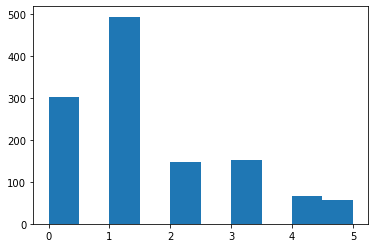

In [473]:
#deleting 0
indy0=np.where(yy==0)
indy0=np.array(indy0[0])
print(indy0.shape)
#indx.shape
fullind=np.arange(0,m)
find=np.delete(fullind,indy0)
print(find.shape)
#deleting 3
indy3=np.where(find==3)
indy3=np.array(indy3[0])
print(indy3.shape)
find=np.delete(find,indy3)
print(find.shape)
xx=xx[find]
yy=yy[find]
yy=yy-1
yy = np.where(yy > 2, yy-1, yy)
print(yy.shape)
plt.hist(yy)


In [468]:
mx,nx=xx.shape
yy=np.reshape(yy,(mx,1))
print(yy.shape)
# ONLY ONCE
df = pd.DataFrame(np.hstack((yy,xx)))
### save to xlsx file
filepath = 'Disfluent_Uclass_changed.xlsx'
df.to_excel(filepath, index=False)
#df = pd.DataFrame(yy)
### save to xlsx file
#filepath = 'Disfluent_labels_Uclass_changed.xlsx'
#df.to_excel(filepath, index=False)

(1216, 1)


In [352]:
getval=pd.read_excel('Disfluent_Uclass_changed.xlsx')
getval=np.array(getval)
m,n=getval.shape
yy=getval[:,0]
yy=np.array(yy)
m=yy.shape
print(m)
xx=getval[:,1:n]
m1,n1=xx.shape
print(m1,n1)

(5444,)
5444 40


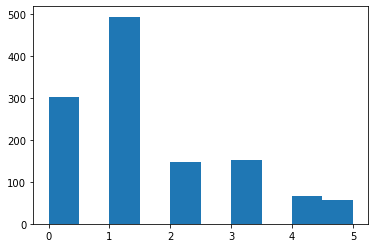

[[302.]
 [493.]
 [146.]
 [152.]
 [ 66.]
 [ 57.]]


In [474]:
classes=5
# load the dataset
# create histogram plot
plt.hist(yy)
# show plot
pyplot.show()
storechange=np.zeros((classes+1,1))
for i  in range(0,classes+1):
    store=np.where(yy==i)[0]
    storechange[i]=float(len(store))
samperclass=min(storechange)
print(storechange)

In [475]:
strings=['target']
for i in range(1,41):
    strings.append('features'+str(i))
print(strings)

['target', 'features1', 'features2', 'features3', 'features4', 'features5', 'features6', 'features7', 'features8', 'features9', 'features10', 'features11', 'features12', 'features13', 'features14', 'features15', 'features16', 'features17', 'features18', 'features19', 'features20', 'features21', 'features22', 'features23', 'features24', 'features25', 'features26', 'features27', 'features28', 'features29', 'features30', 'features31', 'features32', 'features33', 'features34', 'features35', 'features36', 'features37', 'features38', 'features39', 'features40']


In [476]:
df_train = pd.DataFrame (yy, columns = ['target'])
df=np.zeros((m1,n1+1))
df[:,0]=yy[:];
df[:,1:]=xx;
df_train=pd.DataFrame(df)
df_train.columns=strings
df_train

ValueError: could not broadcast input array from shape (1216) into shape (5444)

In [510]:
labels = df_train.columns[1:]
X = df_train[labels]
y = df_train['target']
print(X.shape)
print(y.shape)
#X=pd.DataFrame(xx)
#y=pd.DataFrame(yy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

conf_mat = confusion_matrix(y_true=y_train, y_pred=y_pred)
#print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1','Class 2','Class 3','Class 4','Class 5']
plot_confusion_matrix(conf_mat,labels)
print("Done")

(1216, 0)
(1216,)


XGBoostError: [05:52:42] C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:567: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

Class=0, n=4227 (12.500%)
Class=1, n=4227 (12.500%)
Class=4, n=4227 (12.500%)
Class=2, n=4227 (12.500%)
Class=7, n=4227 (12.500%)
Class=3, n=4227 (12.500%)
Class=6, n=4227 (12.500%)
Class=5, n=4227 (12.500%)


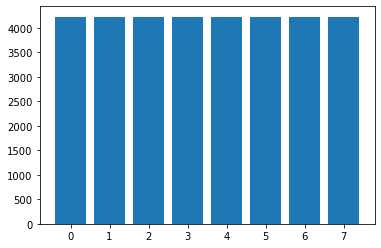

In [492]:
X, y = oversample.fit_resample(xx, yy)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 #plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [486]:
xx=np.array(X)
rows,columns=xx.shape
print(xx.shape)
yy=np.reshape(np.array(y),(rows,1))
print(yy.shape)
df = pd.DataFrame(np.hstack((yy,xx)))
### save to xlsx file
#filepath = 'Disfluent_Uclass_changed.xlsx'
#df.to_excel(filepath, index=False)
df

(33816, 40)
(33816, 1)


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.034948,0.003799,0.003892,0.027915,0.016723,0.066147,0.064433,0.017930,0.004984,...,0.002887,0.204457,0.012731,0.008766,0.018047,0.015365,0.004902,0.003543,0.002686,0.021543
1,0.0,0.034948,0.003799,0.003892,0.027915,0.016723,0.066147,0.064433,0.017930,0.004984,...,0.002887,0.204457,0.012731,0.008766,0.018047,0.015365,0.004902,0.003543,0.002686,0.021543
2,0.0,0.034948,0.003799,0.003892,0.027915,0.016723,0.066147,0.064433,0.017930,0.004984,...,0.002887,0.204457,0.012731,0.008766,0.018047,0.015365,0.004902,0.003543,0.002686,0.021543
3,1.0,0.006336,0.006132,0.004192,0.020029,0.003815,0.042957,0.064216,0.074883,0.008472,...,0.002737,0.165133,0.004722,0.018173,0.026261,0.005195,0.006571,0.004476,0.003173,0.015875
4,4.0,0.006336,0.006132,0.004192,0.020029,0.003815,0.042957,0.064216,0.074883,0.008472,...,0.002737,0.165133,0.004722,0.018173,0.026261,0.005195,0.006571,0.004476,0.003173,0.015875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33811,7.0,0.015164,0.001464,0.001464,0.001956,0.013903,0.017181,0.204452,0.010440,0.000795,...,0.000422,0.120879,0.001690,0.002896,0.047000,0.005587,0.001863,0.000706,0.001434,0.008520
33812,7.0,0.024478,0.005075,0.007457,0.009120,0.015131,0.035067,0.090227,0.067423,0.003664,...,0.001326,0.198344,0.004503,0.008156,0.053497,0.009244,0.004702,0.003731,0.008721,0.033573
33813,7.0,0.024126,0.004274,0.002788,0.002984,0.025339,0.027936,0.112027,0.023393,0.001580,...,0.001174,0.158466,0.004542,0.004696,0.054259,0.005790,0.005120,0.001267,0.003121,0.022629
33814,7.0,0.022628,0.004949,0.001053,0.001735,0.009961,0.085952,0.243726,0.030811,0.000893,...,0.000545,0.167854,0.000586,0.001475,0.070889,0.006611,0.002108,0.000845,0.001304,0.008060


In [487]:
df_shuffle = df.sample(frac = 1) 
filepath = 'Disfluent_Uclass_changed.xlsx'
df_shuffle.to_excel(filepath, index=False)
df_shuffle

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
28633,6.0,0.016517,0.006253,0.004962,0.006715,0.007089,0.028844,0.123168,0.022166,0.002106,...,0.004418,0.304155,0.005230,0.007202,0.022397,0.008264,0.009544,0.003696,0.006364,0.012268
18922,4.0,0.021011,0.010401,0.006003,0.008268,0.014738,0.054896,0.070638,0.037588,0.007659,...,0.001791,0.213333,0.008975,0.008135,0.020351,0.006084,0.009995,0.002311,0.007153,0.035814
21450,5.0,0.011853,0.006512,0.003588,0.004589,0.006343,0.049001,0.079362,0.047257,0.003801,...,0.001301,0.284990,0.002257,0.013353,0.019445,0.003730,0.002871,0.003048,0.005016,0.016772
19624,4.0,0.011383,0.003802,0.004513,0.006030,0.005296,0.075868,0.076951,0.043404,0.003941,...,0.003022,0.235365,0.005332,0.005873,0.042094,0.007518,0.007794,0.002248,0.006763,0.048227
8498,1.0,0.000799,0.000540,0.000652,0.000441,0.001689,0.018535,0.029831,0.018891,0.002234,...,0.000089,0.393119,0.000053,0.003111,0.003121,0.000507,0.000066,0.000034,0.000536,0.004505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,0.0,0.002790,0.012438,0.014149,0.003543,0.012459,0.111392,0.042735,0.042272,0.003310,...,0.000929,0.188624,0.008808,0.013184,0.040644,0.013358,0.004001,0.002023,0.003658,0.067060
31001,7.0,0.000055,0.000012,0.000090,0.000023,0.003509,0.061600,0.247530,0.001561,0.000200,...,0.000007,0.012653,0.000002,0.000140,0.022465,0.000247,0.000003,0.000013,0.000207,0.000193
22145,5.0,0.071855,0.013295,0.006570,0.008388,0.004435,0.013876,0.102784,0.015549,0.003382,...,0.010080,0.122990,0.005967,0.007560,0.062940,0.003525,0.011878,0.001187,0.009447,0.009167
17785,4.0,0.003498,0.000091,0.000702,0.000695,0.013285,0.245271,0.075379,0.011647,0.000189,...,0.000041,0.221800,0.000353,0.003678,0.123337,0.000828,0.000244,0.000040,0.000505,0.000626


In [365]:
df = pd.DataFrame(X)
### save to xlsx file
filepath = 'SMOTE_features_Uclass.xlsx'
df.to_excel(filepath, index=False)
df = pd.DataFrame(y)
### save to xlsx file
filepath = 'SMOTE_labels_Uclass.xlsx'
df.to_excel(filepath, index=False)

KeyboardInterrupt: 

In [ ]:
#yy=np.array(y)
#xx=np.array(X)
#m2,n2=xx.shape
#print(m2,n2)
#train_test=4500
#temp=yy
#u=len(yy)
#yy=temp[0:train_test]
#YY=temp[train_test:u]
#print(yy.shape)
#print(YY.shape)
#temp=xx
#xx=temp[0:train_test]
#print(xx.shape)
#XX=temp[train_test:m2]
#print(XX.shape)

Class=0, n=4227 (12.500%)
Class=1, n=4227 (12.500%)
Class=4, n=4227 (12.500%)
Class=2, n=4227 (12.500%)
Class=7, n=4227 (12.500%)
Class=3, n=4227 (12.500%)
Class=6, n=4227 (12.500%)
Class=5, n=4227 (12.500%)


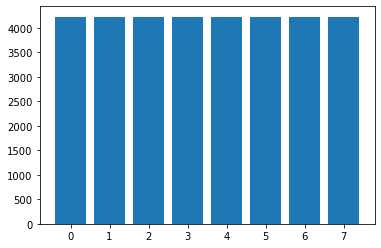

In [493]:
xx, XX, yy, YY = train_test_split(X, y, test_size=0.1,shuffle=True)
xx=np.array(xx)
XX=np.array(XX)
yy=np.array(yy)
YY=np.array(YY)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 #plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [494]:
temp1=XX*10000000
XX=temp1
XX=XX.astype(int)
print(type(XX))
print(type(XX[0]))
print(type(XX[0][0]))
m1,n1=XX.shape
## Converting form and reshaping
testy=np.reshape(YY,(m1,))
## Changing datatypes
testx=np.empty((m1,),object)
for i in range (0,m1):
    testx[i]=list(int(r) for r in XX[i])
    testy[i]=testy[i].astype(int)
TX=testx
TY=testy
del testx
del testy
print(type(TX))
print(type(TX[0]))
print(type(TX[0][0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'int'>


In [495]:
xx=xx*10000000
xx=xx.astype(int)
print(type(xx))
print(type(xx[0]))
print(type(xx[0][0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.int32'>


In [496]:
max_value=(max([max(element) for element in xx]))
print(min([min(element) for element in xx]))
vocab_size = max_value+1
print(vocab_size)
height,width=xx.shape
maxlen=width
print(maxlen)
samples=height;
print(samples)
Folds=10;
foldlen=int(samples/Folds);
print(foldlen)

0
9999999
40
30434
3043


In [497]:
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=6):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        ## x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)
        
        ## (batch_size, seq_len, embed_dim)
        key = self.key_dense(inputs) 
        
        ## (batch_size, seq_len, embed_dim)
        value = self.value_dense(inputs) 
        
        ## (batch_size, seq_len, embed_dim)
        query = self.separate_heads(
            query, batch_size
        )  
        ## (batch_size, num_heads, seq_len, projection_dim)
        key = self.separate_heads(
            key, batch_size
        )  
        ## (batch_size, num_heads, seq_len, projection_dim)
        value = self.separate_heads(
            value, batch_size
        )  
        ## (batch_size, num_heads, seq_len, projection_dim)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  
        ## (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  
        ## (batch_size, seq_len, embed_dim)
        output = self.combine_heads(
            concat_attention
        )  
        ## (batch_size, seq_len, embed_dim)
        return output

In [498]:
class TransformerBlock(layers.Layer):
    ## For calling multihead attention on embedded data and arranging it sequentially and adding other layers.
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.01):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)
        
    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [499]:
class TokenAndPositionEmbedding(layers.Layer):
    ## For preliminary token generation and embedding
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [500]:
embed_dim = 30  ## Embedding size for each token
num_heads = 6  ## Number of attention heads
ff_dim = 30  ## Hidden layer size in feed forward network inside transformer

## Tokenizing input data with max dimension and embedding it
inputs = layers.Input(shape=(maxlen,))
#x = keras.Sequential()
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)

## Adding Sequential layer to the embedded data and attention layers too.
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)

## Add other layers
x = layers.Conv1D(6,3,padding="same")(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.MaxPool1D(pool_size=2, strides=2)(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dropout(0.5)(x)

## Producing general softmax layer for classification
outputs = layers.Dense(8, activation="softmax")(x)

## Generating model
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 40)]              0         
_________________________________________________________________
token_and_position_embedding (None, 40, 30)            300001170 
_________________________________________________________________
transformer_block_1 (Transfo (None, 40, 30)            5700      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40, 6)             546       
_________________________________________________________________
dense_18 (Dense)             (None, 40, 30)            210       
_________________________________________________________________
dropout_9 (Dropout)          (None, 40, 30)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 20, 30)            0   

Epoch 1/2
274/274 [==============================] - 792s 3s/step - loss: 2.0900 - accuracy: 0.1250 - val_loss: 2.0736 - val_accuracy: 0.2271
Epoch 2/2
274/274 [==============================] - 693s 3s/step - loss: 1.9775 - accuracy: 0.1855 - val_loss: 1.7426 - val_accuracy: 0.3036
Training Performance [1.7139655351638794, 0.32236865162849426]
Testing Performance [1.7426413297653198, 0.3036477267742157]


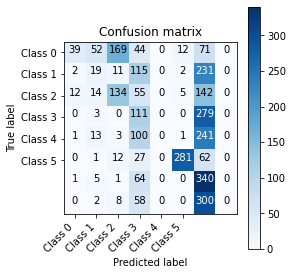

Model Performance [1.742794156074524, 0.2962743937969208]
Epoch 1/2
274/274 [==============================] - 760s 3s/step - loss: 1.7280 - accuracy: 0.2998 - val_loss: 1.6032 - val_accuracy: 0.4302
Epoch 2/2
274/274 [==============================] - 754s 3s/step - loss: 1.5333 - accuracy: 0.3737 - val_loss: 1.5315 - val_accuracy: 0.4239
Training Performance [1.3435677289962769, 0.52250736951828]
Testing Performance [1.5315160751342773, 0.4239237606525421]


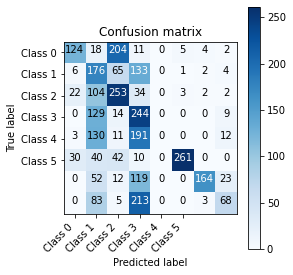

Model Performance [1.6015733480453491, 0.38172680139541626]
Epoch 1/2
274/274 [==============================] - 740s 3s/step - loss: 1.4287 - accuracy: 0.4341 - val_loss: 1.3109 - val_accuracy: 0.4972
Epoch 2/2
274/274 [==============================] - 764s 3s/step - loss: 1.2836 - accuracy: 0.5011 - val_loss: 1.2817 - val_accuracy: 0.4844
Training Performance [1.1428894996643066, 0.5630316734313965]
Testing Performance [1.2816660404205322, 0.48439040780067444]


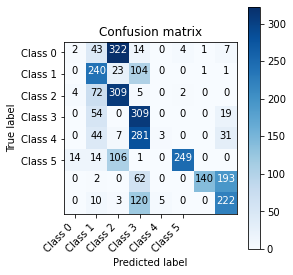

Model Performance [1.6915391683578491, 0.35393258929252625]
Epoch 1/2
274/274 [==============================] - 763s 3s/step - loss: 1.2064 - accuracy: 0.5385 - val_loss: 1.1101 - val_accuracy: 0.5412
Epoch 2/2
274/274 [==============================] - 765s 3s/step - loss: 1.0888 - accuracy: 0.5992 - val_loss: 1.1433 - val_accuracy: 0.4959
Training Performance [1.0145859718322754, 0.5946113467216492]
Testing Performance [1.1433454751968384, 0.495892196893692]


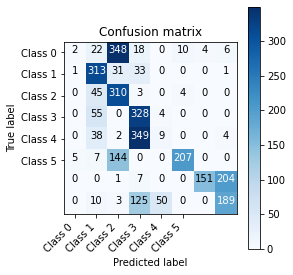

Model Performance [1.8485840559005737, 0.33737432956695557]
Epoch 1/2
274/274 [==============================] - 740s 3s/step - loss: 1.0455 - accuracy: 0.6209 - val_loss: 0.9991 - val_accuracy: 0.6119
Epoch 2/2
274/274 [==============================] - 755s 3s/step - loss: 0.9801 - accuracy: 0.6575 - val_loss: 0.9574 - val_accuracy: 0.6438
Training Performance [0.8607305884361267, 0.6920521259307861]
Testing Performance [0.957417368888855, 0.6437726020812988]


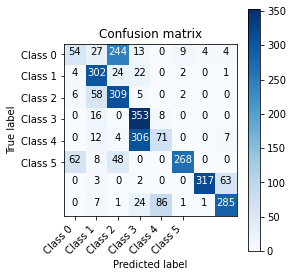

Model Performance [1.9684792757034302, 0.36162033677101135]
Epoch 1/2
274/274 [==============================] - 781s 3s/step - loss: 0.9350 - accuracy: 0.6837 - val_loss: 0.8283 - val_accuracy: 0.6950
Epoch 2/2
274/274 [==============================] - 776s 3s/step - loss: 0.8877 - accuracy: 0.7138 - val_loss: 0.8031 - val_accuracy: 0.7197
Training Performance [0.7537102103233337, 0.7582417726516724]
Testing Performance [0.8030705451965332, 0.7196845412254333]


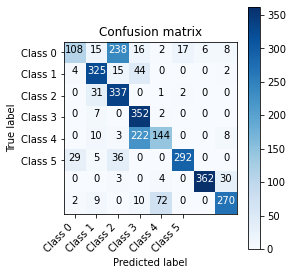

Model Performance [2.1169042587280273, 0.38764044642448425]
Epoch 1/2
274/274 [==============================] - 777s 3s/step - loss: 0.8927 - accuracy: 0.7257 - val_loss: 0.7691 - val_accuracy: 0.6878
Epoch 2/2
274/274 [==============================] - 782s 3s/step - loss: 0.8282 - accuracy: 0.7519 - val_loss: 0.7776 - val_accuracy: 0.6878
Training Performance [0.7350633144378662, 0.7536417245864868]
Testing Performance [0.7776231169700623, 0.687808096408844]


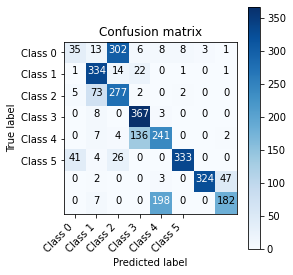

Model Performance [2.2820887565612793, 0.37403902411460876]
Epoch 1/2
274/274 [==============================] - 785s 3s/step - loss: 0.7857 - accuracy: 0.7751 - val_loss: 0.7597 - val_accuracy: 0.7479
Epoch 2/2
274/274 [==============================] - 781s 3s/step - loss: 0.7591 - accuracy: 0.7839 - val_loss: 0.6698 - val_accuracy: 0.7989
Training Performance [0.5803450345993042, 0.8259282112121582]
Testing Performance [0.6698077917098999, 0.7988826632499695]


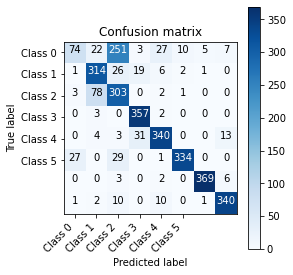

Model Performance [2.459365129470825, 0.41070371866226196]
Epoch 1/2
274/274 [==============================] - 787s 3s/step - loss: 0.7333 - accuracy: 0.8079 - val_loss: 0.5737 - val_accuracy: 0.8511
Epoch 2/2
274/274 [==============================] - 782s 3s/step - loss: 0.6826 - accuracy: 0.8092 - val_loss: 0.5577 - val_accuracy: 0.8462
Training Performance [0.524703323841095, 0.8522507548332214]
Testing Performance [0.5577406883239746, 0.846204400062561]


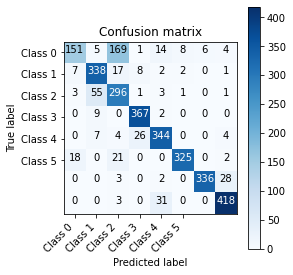

Model Performance [2.573667287826538, 0.42253103852272034]
Epoch 1/2
274/274 [==============================] - 783s 3s/step - loss: 0.6576 - accuracy: 0.8273 - val_loss: 0.5082 - val_accuracy: 0.8255
Epoch 2/2
274/274 [==============================] - 781s 3s/step - loss: 0.6371 - accuracy: 0.8297 - val_loss: 0.4681 - val_accuracy: 0.8640
Training Performance [0.47173818945884705, 0.8710525631904602]
Testing Performance [0.46812674403190613, 0.8639500737190247]


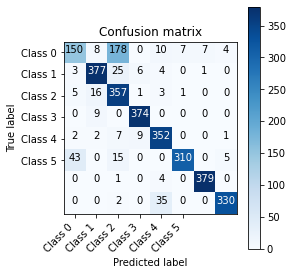

Model Performance [2.7615699768066406, 0.4296274483203888]


In [501]:
#Cross Validation:
trainacc=[]
testacc=[]
modelacc=[]
for i in range(0,Folds):
    tempmodel=model
    TestX=xx[foldlen*(i):foldlen*(i+1)];
    TestY=yy[foldlen*(i):foldlen*(i+1)];
    testfold=np.arange(foldlen*(i),foldlen*(i+1));
    trainfold=np.arange(0,samples);
    #for j in range(0,foldlen):
    trainfold=np.delete(trainfold,testfold);
    TrainX=xx[trainfold];
    TrainY=yy[trainfold];
    #print(TrainX.shape);
    #print(TestX.shape);
    
    m,n=TestX.shape
    ## Converting form and reshaping
    testy=np.reshape(TestY,(m,))
    ## Changing datatypes
    testx=np.empty((m,),object)
    for i in range (0,m):
        testx[i]=list(int(v) for v in TestX[i])
        testy[i]=testy[i].astype(int)
    ## Printing data-types - relevant to transformer input

    ## Converting Train Data and Getting size of data
    m,n=TrainX.shape
    ## Converting form and reshaping
    trainy=np.reshape(TrainY,(m,))
    ## Changing datatypes
    trainx=np.empty((m,),object)
    for i in range (0,m):
        trainx[i]=list(int(v) for v in TrainX[i])
        trainy[i]=TrainY[i].astype(int)    
    ## Printing data-types - relevant to transformer input
    
    trainx = keras.preprocessing.sequence.pad_sequences(trainx,maxlen=maxlen)
    testx = keras.preprocessing.sequence.pad_sequences(testx,maxlen=maxlen)
    TX = keras.preprocessing.sequence.pad_sequences(TX,maxlen=maxlen)
    #print(trainx.shape,trainy.shape,testx.shape,testy.shape)
    
    tempmodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history = tempmodel.fit(trainx, trainy, batch_size=100, epochs=2,validation_data=(testx, testy))
    
    
    score = tempmodel.evaluate(trainx, trainy, verbose=0)
    print("Training Performance",score)
    trainacc.append(score)
    score = tempmodel.evaluate(testx, testy, verbose=0)
    print("Testing Performance",score)
    testacc.append(score)
    
    predicted=tempmodel.predict(testx)
    predicted=np.array(predicted)
    ypred=np.argmax(predicted,axis=1)
    testy=np.array(testy)
    ypred=np.array(ypred)
    conf_mat = confusion_matrix(testy,ypred)
    labels = ['Class 0', 'Class 1','Class 2','Class 3','Class 4','Class 5','Class 6', 'Class 7']
    plot_confusion_matrix(conf_mat,labels)
    
    score = tempmodel.evaluate(TX, TY, verbose=0)
    print("Model Performance",score)
    modelacc.append(score)
    
    ## summarize history for accuracy
    #plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    #plt.title('model accuracy')
    #plt.ylabel('accuracy')
    #plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    #plt.show()
    ## summarize history for loss
    #plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    #plt.title('model loss')
    #plt.ylabel('loss')
    #plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    #plt.show()
    
    del history
    keras.backend.clear_session()
    del tempmodel

[[1.7139655351638794, 0.32236865162849426], [1.3435677289962769, 0.52250736951828], [1.1428894996643066, 0.5630316734313965], [1.0145859718322754, 0.5946113467216492], [0.8607305884361267, 0.6920521259307861], [0.7537102103233337, 0.7582417726516724], [0.7350633144378662, 0.7536417245864868], [0.5803450345993042, 0.8259282112121582], [0.524703323841095, 0.8522507548332214], [0.47173818945884705, 0.8710525631904602]]


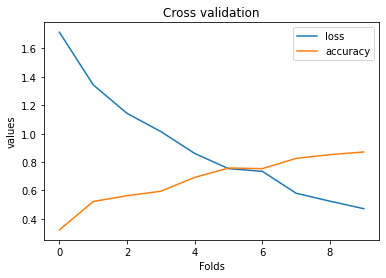

In [502]:
print(trainacc)
plt.plot(trainacc)
plt.title('Cross validation')
plt.ylabel('values')
plt.xlabel('Folds')
plt.yscale('linear')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

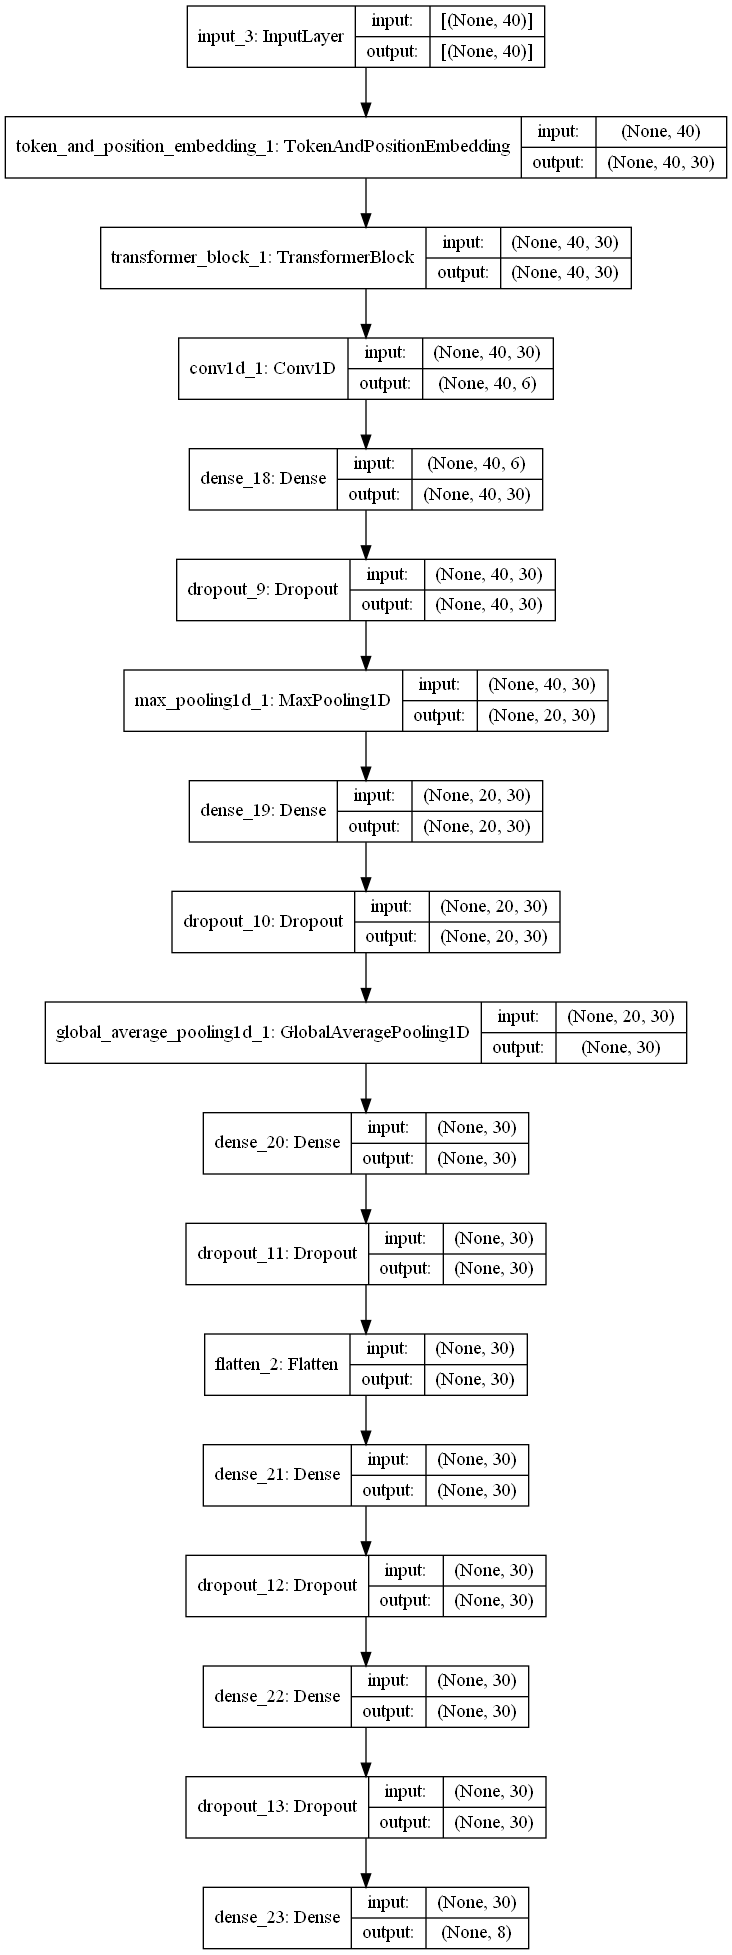

In [503]:
dot_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

[[1.7426413297653198, 0.3036477267742157], [1.5315160751342773, 0.4239237606525421], [1.2816660404205322, 0.48439040780067444], [1.1433454751968384, 0.495892196893692], [0.957417368888855, 0.6437726020812988], [0.8030705451965332, 0.7196845412254333], [0.7776231169700623, 0.687808096408844], [0.6698077917098999, 0.7988826632499695], [0.5577406883239746, 0.846204400062561], [0.46812674403190613, 0.8639500737190247]]


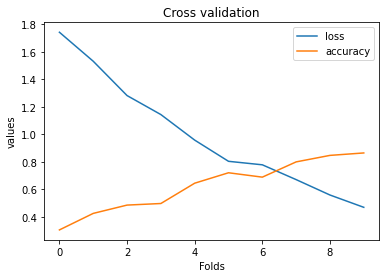

In [504]:
print(testacc)
plt.plot(testacc)
plt.title('Cross validation')
plt.ylabel('values')
plt.xlabel('Folds')
plt.yscale('linear')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

[[1.742794156074524, 0.2962743937969208], [1.6015733480453491, 0.38172680139541626], [1.6915391683578491, 0.35393258929252625], [1.8485840559005737, 0.33737432956695557], [1.9684792757034302, 0.36162033677101135], [2.1169042587280273, 0.38764044642448425], [2.2820887565612793, 0.37403902411460876], [2.459365129470825, 0.41070371866226196], [2.573667287826538, 0.42253103852272034], [2.7615699768066406, 0.4296274483203888]]


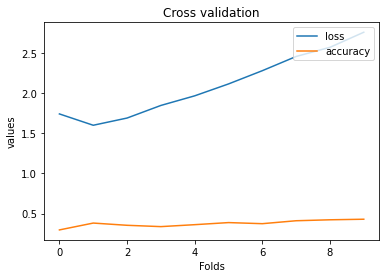

In [505]:
print(modelacc)
plt.plot(modelacc)
plt.title('Cross validation')
plt.ylabel('values')
plt.xlabel('Folds')
plt.yscale('linear')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [186]:
tempmodel=model
tempmodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(trainx, trainy, batch_size=100, epochs=5,validation_data=(testx, testy))

Epoch 1/5
12/12 [==============================] - 35s 3s/step - loss: 1.6039 - accuracy: 0.3257 - val_loss: 1.5500 - val_accuracy: 0.4803
Epoch 2/5
12/12 [==============================] - 31s 3s/step - loss: 1.5959 - accuracy: 0.3599 - val_loss: 1.5333 - val_accuracy: 0.4803
Epoch 3/5
12/12 [==============================] - 31s 3s/step - loss: 1.5875 - accuracy: 0.3523 - val_loss: 1.5263 - val_accuracy: 0.4803
Epoch 4/5
12/12 [==============================] - 31s 3s/step - loss: 1.6008 - accuracy: 0.3773 - val_loss: 1.5042 - val_accuracy: 0.4803
Epoch 5/5
12/12 [==============================] - 31s 3s/step - loss: 1.5887 - accuracy: 0.3485 - val_loss: 1.5101 - val_accuracy: 0.4803


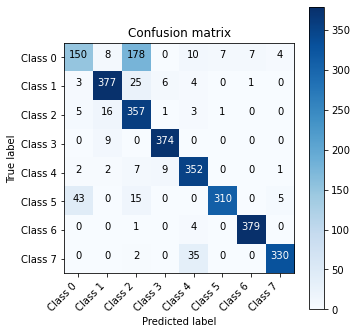

In [507]:
tempmodel=model
arr=tempmodel.predict(testx)
arr=np.array(arr)
TP=np.argmax(arr,axis=1)
TP=np.array(TP)
TY=np.array(TY)
conf_mat = confusion_matrix(testy,TP)
labels = ['Class 0', 'Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7']
#fig = plt.figure()
#ax = fig.add_subplot(111)
#cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
#fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
#plt.xlabel('Predicted')
#plt.ylabel('Expected')
#plt.figure(figsize=(20, 10))
##plt.show()
plot_confusion_matrix(conf_mat,labels)

In [188]:
del tempmodel

In [508]:
tempx=X
tempy=y

print(tempy)

[0. 0. 0. ... 7. 7. 7.]


8

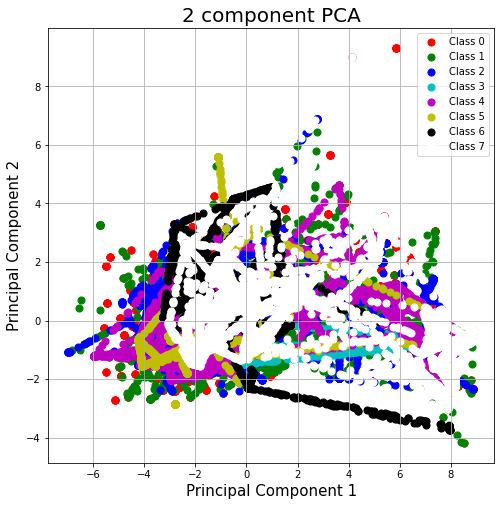

In [509]:
tempx=tempx*100000000
from sklearn.preprocessing import StandardScaler
x_ = StandardScaler().fit_transform(tempx)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = principalDf
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0]
colors = ['r', 'g', 'b','c','m','y','k','w']
summa=0
for target, color in zip(targets,colors):
    tempy=np.array(tempy)
    indices = np.where(y==target)
    index=np.array(indices)
    #print(indices.shape)
    summa=summa+len(index)
    ax.scatter(finalDf.loc[indices, 'principal component 1']
               , finalDf.loc[indices, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()
summa

In [193]:
tempx=trainx
tempy=trainy

print(tempy)

[0. 2. 2. ... 1. 1. 1.]
